# Mount Drive:

In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive%
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2')
!ls

config.py   distributions  README.md	     trained_models
data	    experiments    requirements.txt  utils
DataLoader  __pycache__    results	     visualize


# Import:

In [0]:
!pip install pytorch-ignite

     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import torch
from torch import nn
from torch.optim import SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

from utils.models import get_my_model_Omniglot, fetch_last_checkpoint_model_filename
from DataLoader.dataLoaders import get_omniglot_dataloaders_classification
# from utils.training import run, evaluate

# Dataset:

In [0]:
batch_size_train = 64
batch_size_test = 64
# Dataset
train_loader, valid_loader, test_loader = get_omniglot_dataloaders_classification(batch_size_train, batch_size_test)

Files already downloaded and verified
Number of training examples: 241
Number of testing examples: 31


# Training:

## Training parameters:

In [0]:
# parameters default values
epochs = 50
lr = 1e-3
momentum = 0.9
log_interval = 10  # how many batches to wait before logging training status
criterion =  F.nll_loss

## Run No binary Network:

In [0]:
# parameters model to load no Binary model
binary = False

model, name_model = get_my_model_Omniglot(binary)
print(name_model)

Omniglot_classif_NonBinaryNet


In [0]:
path_model_checkpoint = 'trained_models/Omniglot_classif/No_binary_models/'
path_save_plot = 'results/Omniglot_results/plot_acc_loss/Omniglot_classif/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test no binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/Omniglot_classif/No_binary_models/'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded Omniglot_classif_NonBinaryNet


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 92.89 Avg loss: 0.32


In [0]:
evaluate(model, valid_loader)

In [0]:
evaluate(model, train_loader)

## Run Binary Network:

In [0]:
# parameters model to load no Binary model
binary = True
model, name_model = get_my_model_Omniglot(binary)
print(name_model)

Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
path_model_checkpoint = 'trained_models/Omniglot_classif/Binary_models/'
path_save_plot = 'results/Omniglot_results/plot_acc_loss/Omniglot_classif/'

run(model, path_model_checkpoint, path_save_plot, name_model, train_loader, valid_loader, epochs, lr, momentum, criterion, log_interval)

### Test binary network:

In [0]:
# load model pre trained
path_model = 'trained_models/Omniglot_classif/Binary_models/'
if torch.cuda.is_available():
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model)

Model Loaded Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
evaluate(model, test_loader)

Test Results - Avg accuracy: 91.55 Avg loss: 0.42


In [0]:
evaluate(model, valid_loader)

In [0]:
evaluate(model, train_loader)

# Visualization:

In [0]:
from visualize.viz import visTensor, get_activation, viz_activations, viz_filters
from visualize.viz import viz_heatmap, test_predict_few_examples, standardize_and_clip, format_for_plotting
from visualize.viz import apply_transforms, GradientAscent, get_filter_layer2, get_filter_layer3, get_filter_layer4
from visualize.viz import get_region_layer1, get_region_layer2, get_region_layer3, get_region_layer4, get_regions_interest

# for regions extraction
import collections
from functools import partial
import cv2

## Load models:

In [5]:
# parameters model to load no Binary model
binary = False
model_no_binary, name_model_no_binary = get_my_model_Omniglot(binary)

path_model = 'trained_models/Omniglot_classif/No_binary_models/'
if torch.cuda.is_available():
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_no_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model_no_binary)

Model Loaded Omniglot_classif_NonBinaryNet


In [0]:
# parameters model to load no Binary model
binary = True
model_binary, name_model_binary = get_my_model_Omniglot(binary)

path_model = 'trained_models/Omniglot_classif/Binary_models/'
if torch.cuda.is_available():
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model)))
else:
  model_binary.load_state_dict(torch.load(fetch_last_checkpoint_model_filename(path_model), map_location=torch.device('cpu')))
print("Model Loaded", name_model_binary)

Model Loaded Omniglot_classif_Stochastic_ST_first_conv_binary


In [0]:
print(model_no_binary)

NoBinaryNetOmniglotClassification(
  (layer1): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): ReLU()
  (layer2): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (layer3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer3): ReLU()
  (layer4): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer4): ReLU()
  (fc1): Linear(in_features=12544, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=1623, bias=True)
)


In [0]:
print(model_binary)

BinaryNetOmniglotClassification(
  (layer1): Conv2d(1, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer1): StochasticBinaryActivation(
    (act): Hardsigmoid(
      (act): Hardtanh(min_val=-1.0, max_val=1.0)
    )
  )
  (layer2): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer2): ReLU()
  (layer3): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer3): ReLU()
  (layer4): Conv2d(256, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (batchNorm4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act_layer4): ReLU()
  (fc1): Linear(in_features=12544, out_features=4096, bias=True)


## Visualization few predictions:

No binary model


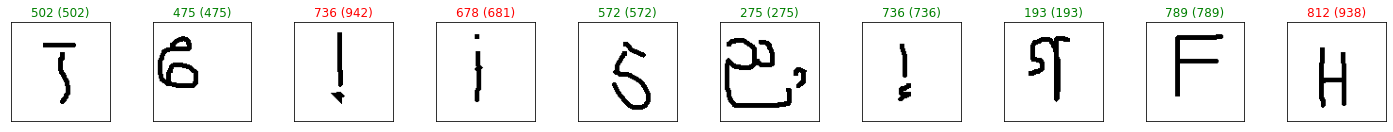

Binary model


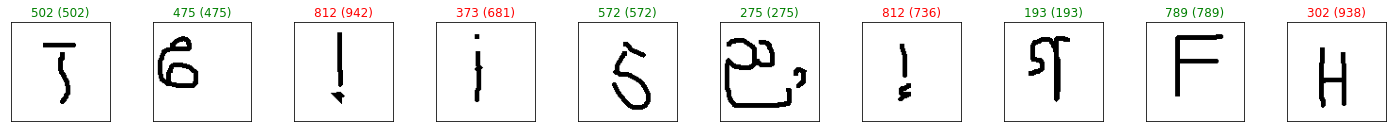

In [0]:
print('No binary model')
test_predict_few_examples(model_no_binary, test_loader)
plt.show()
print('Binary model')
test_predict_few_examples(model_binary, test_loader)
plt.show()

## Visualization Activations values for a specific data:

act_layer1 for label 780


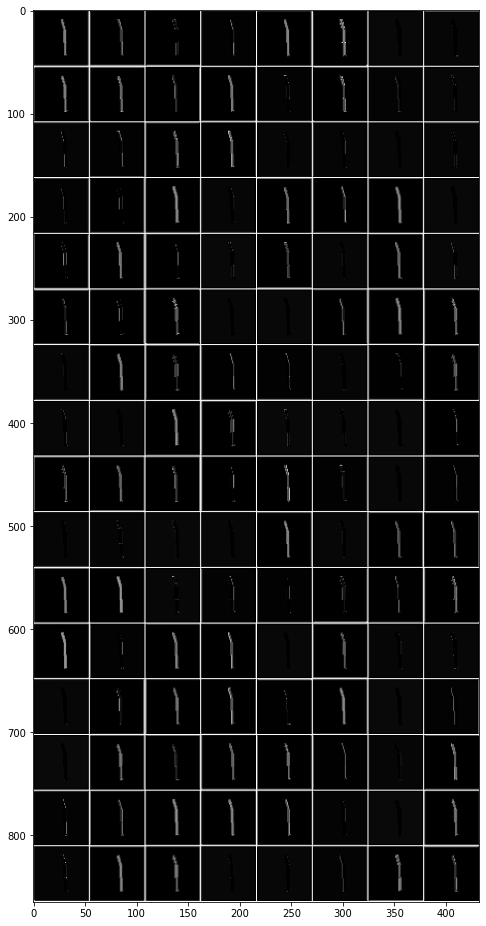

act_layer2 for label 780


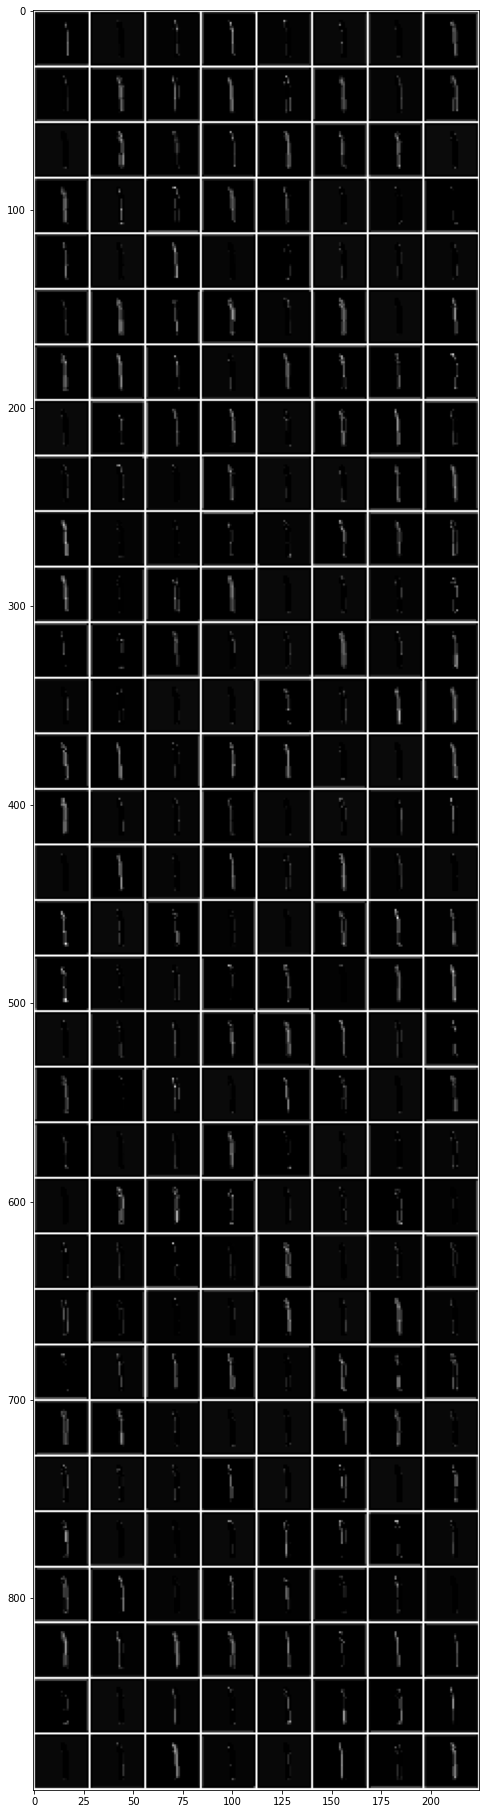

act_layer3 for label 780


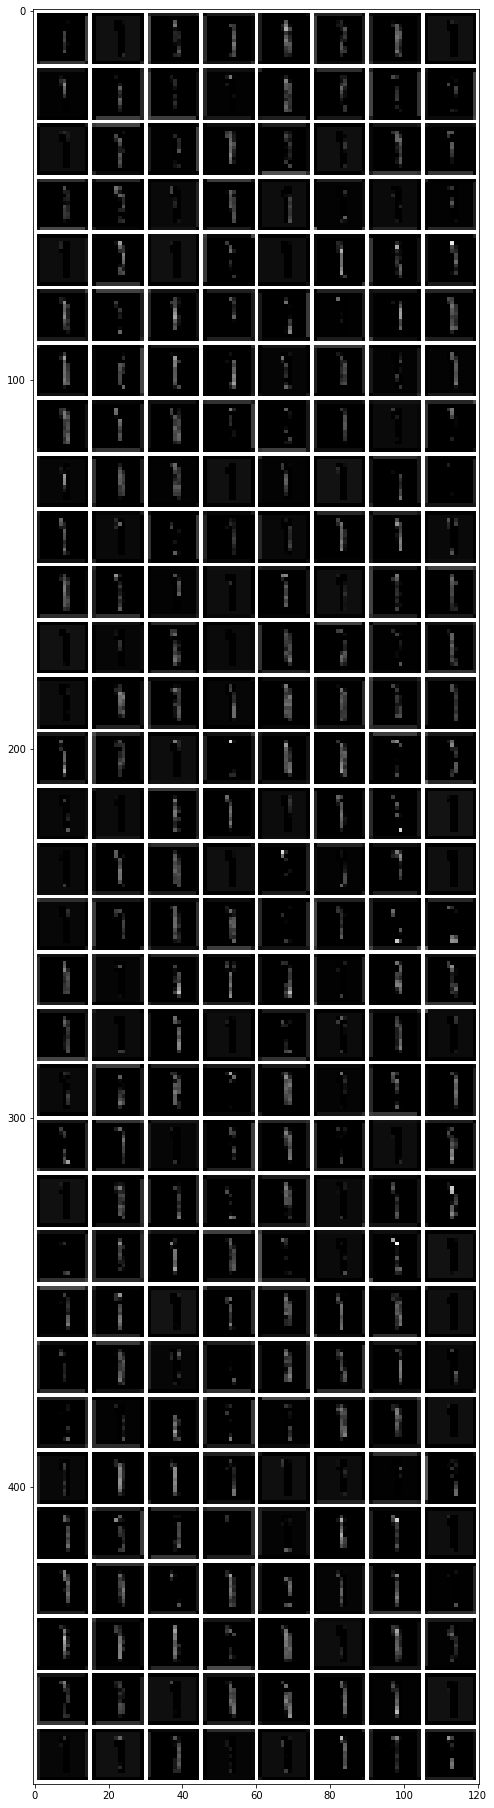

act_layer4 for label 780


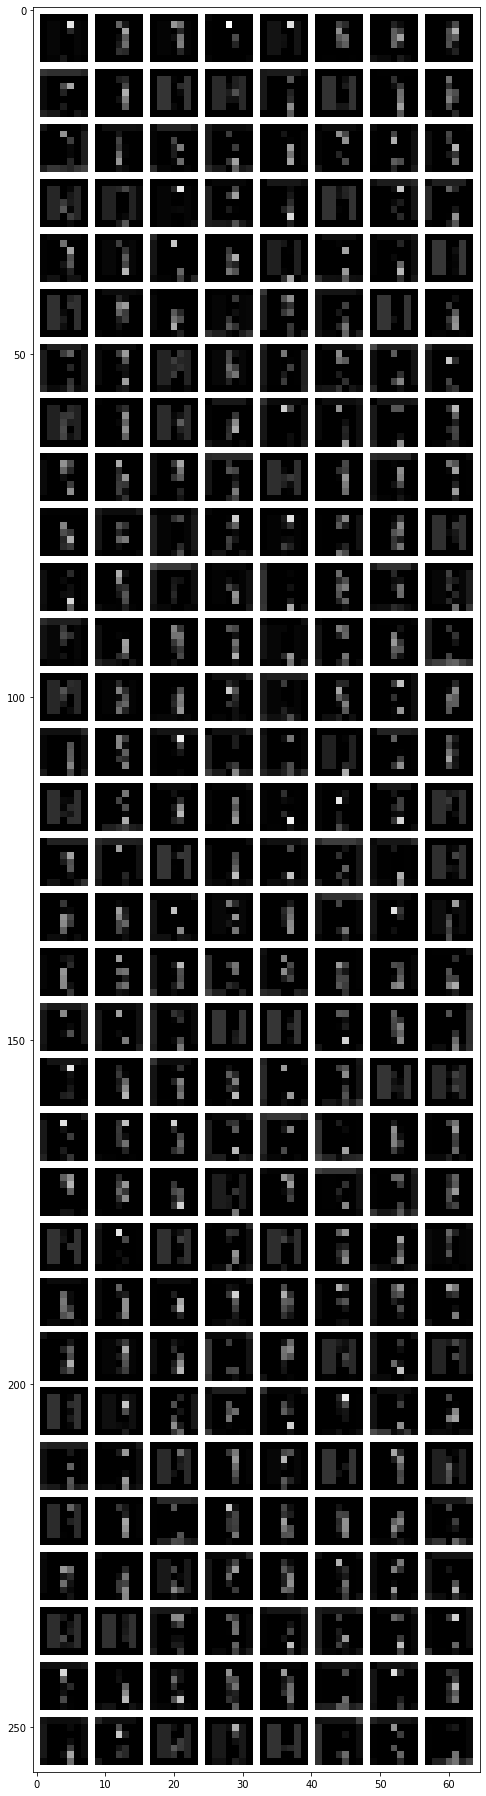

In [0]:
index_data = 10
viz_activations(model_no_binary, test_loader, index_data)

act_layer1.act for label 780


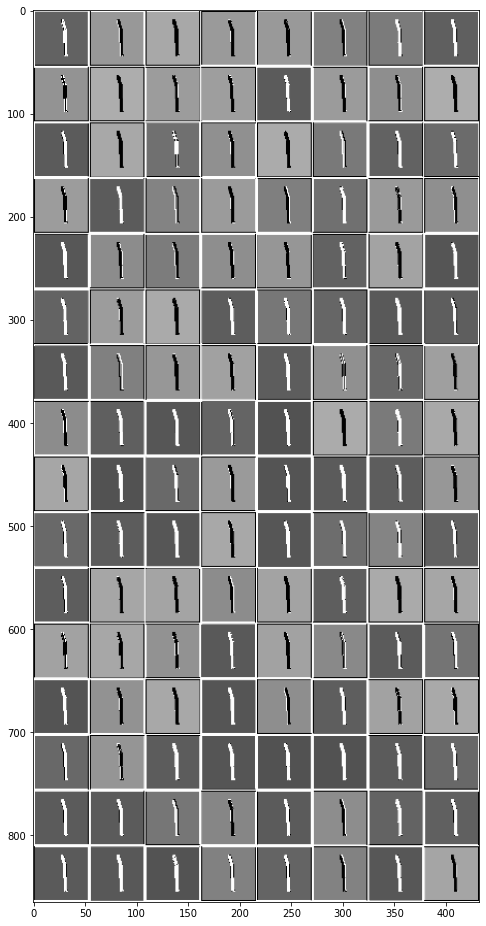

act_layer2 for label 780


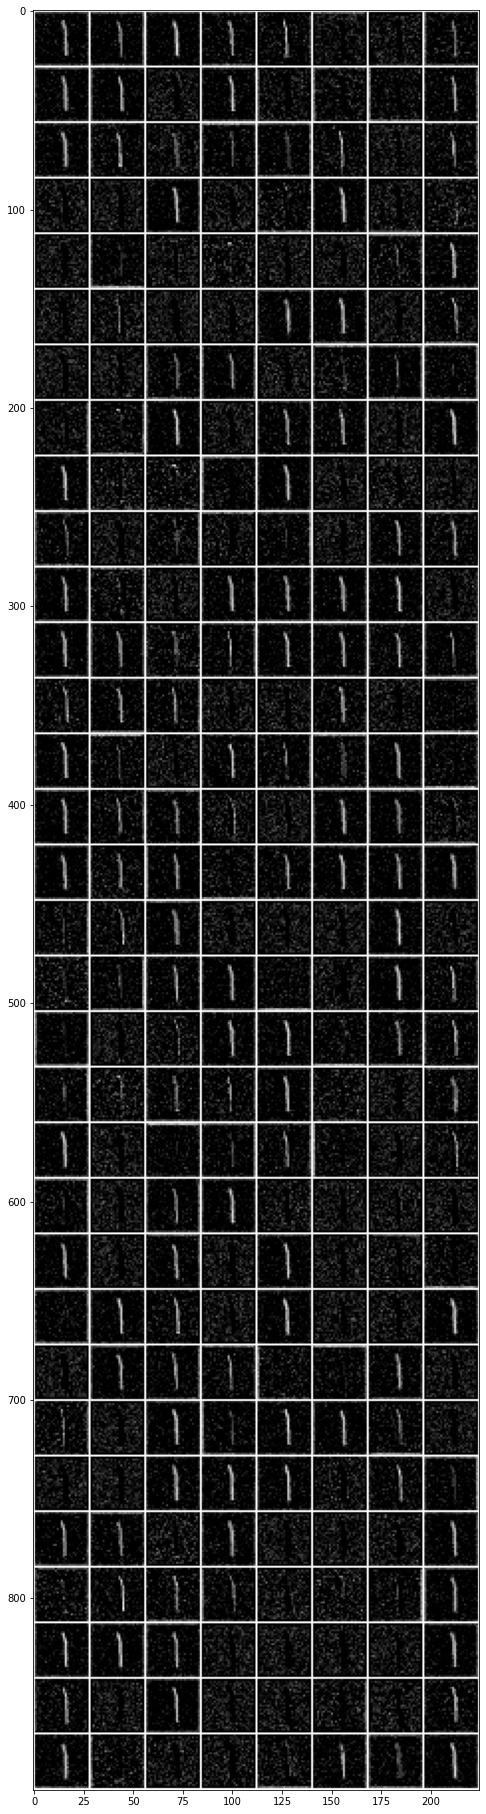

act_layer3 for label 780


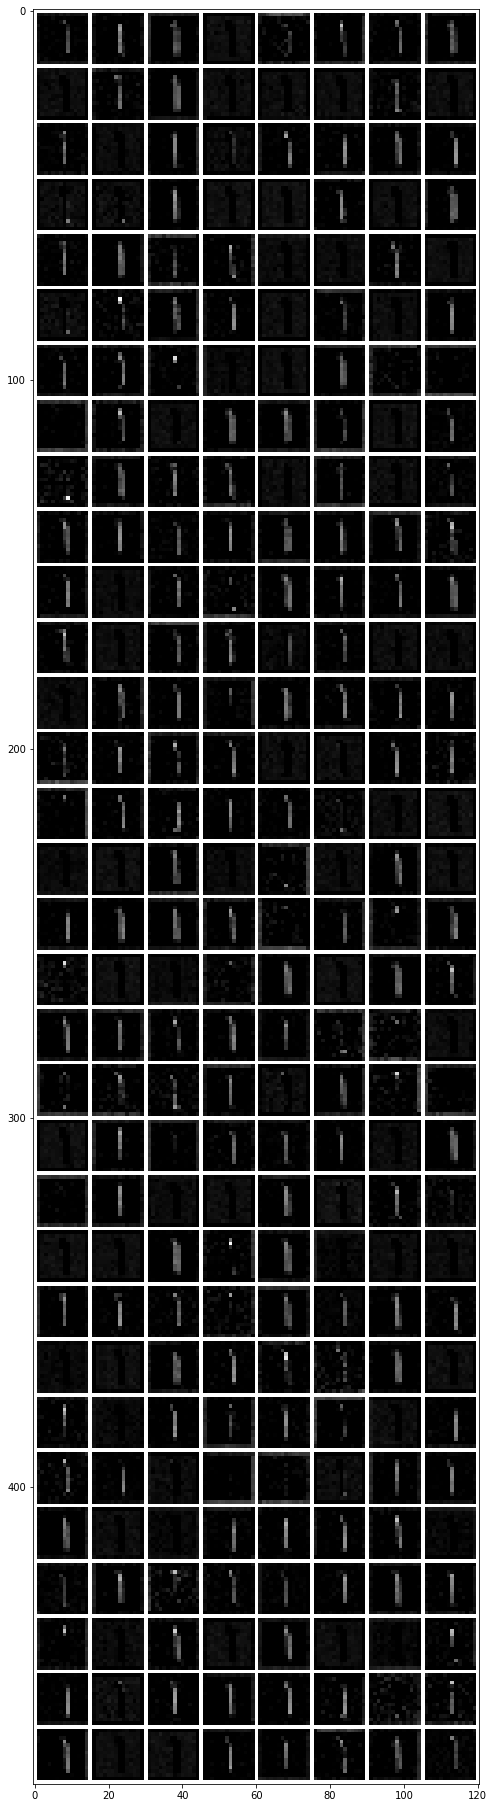

act_layer4 for label 780


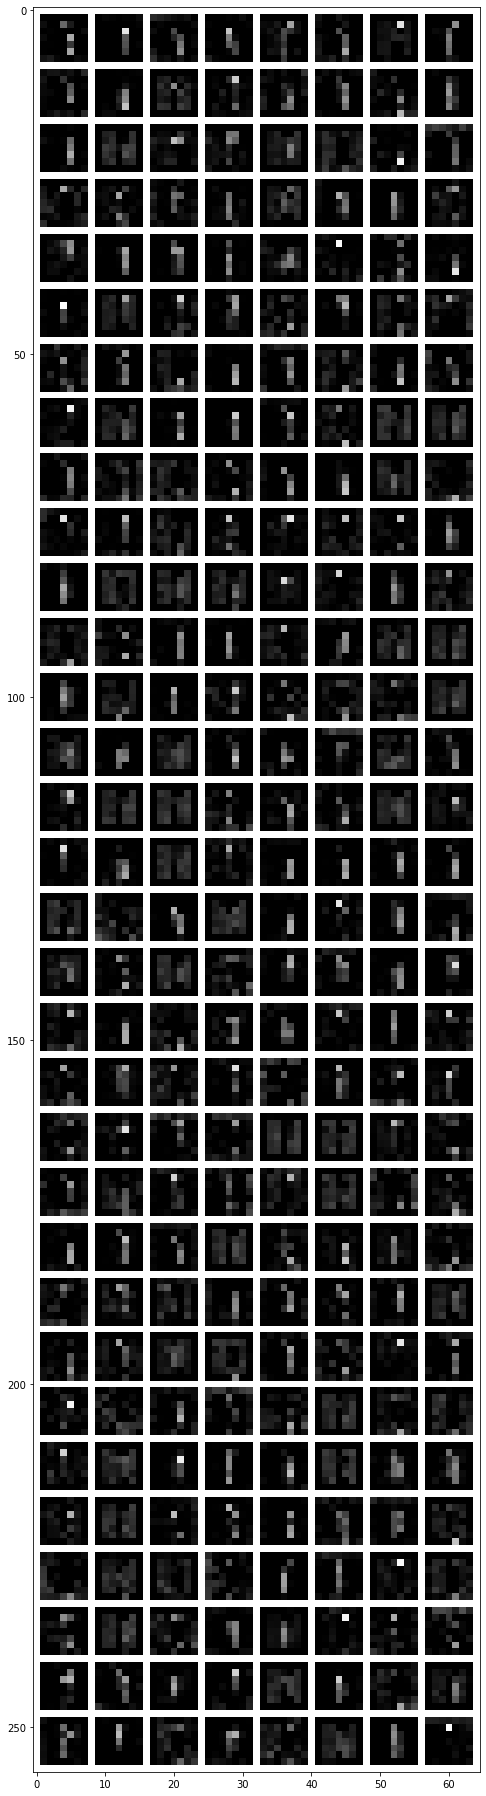

In [0]:
index_data = 10
viz_activations(model_binary, test_loader, index_data)

## Visualization heatmap for a specific data:

layer:act_layer1 :heatrmap for an image of label 780 with model Omniglot_classif_NonBinaryNet


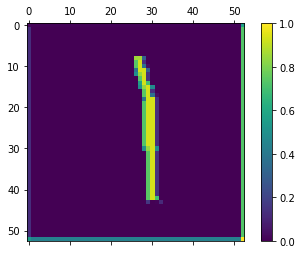

layer:act_layer2 :heatrmap for an image of label 780 with model Omniglot_classif_NonBinaryNet


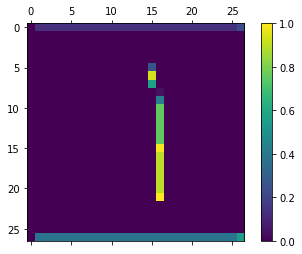

layer:act_layer3 :heatrmap for an image of label 780 with model Omniglot_classif_NonBinaryNet


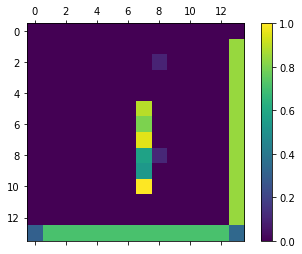

layer:act_layer4 :heatrmap for an image of label 780 with model Omniglot_classif_NonBinaryNet


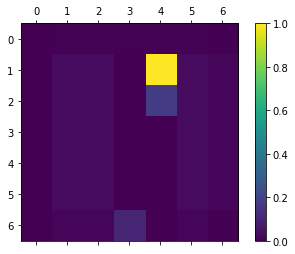

In [0]:
index_data = 10
viz_heatmap(model_no_binary, name_model_no_binary, test_loader, index_data)

layer:act_layer1.act :heatrmap for an image of label 780 with model Omniglot_classif_Stochastic_ST_first_conv_binary


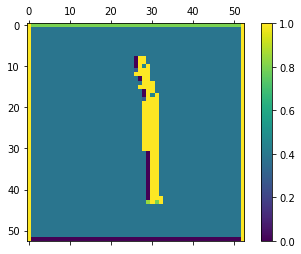

layer:act_layer2 :heatrmap for an image of label 780 with model Omniglot_classif_Stochastic_ST_first_conv_binary


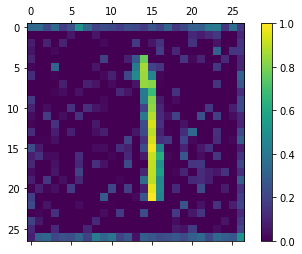

layer:act_layer3 :heatrmap for an image of label 780 with model Omniglot_classif_Stochastic_ST_first_conv_binary


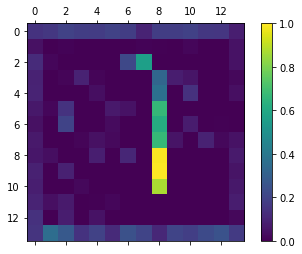

layer:act_layer4 :heatrmap for an image of label 780 with model Omniglot_classif_Stochastic_ST_first_conv_binary


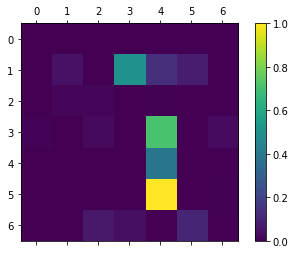

In [0]:
index_data = 10
viz_heatmap(model_binary, name_model_binary, test_loader, index_data)

## Visualization filters trained:

Visualization filters learned for layer: layer1


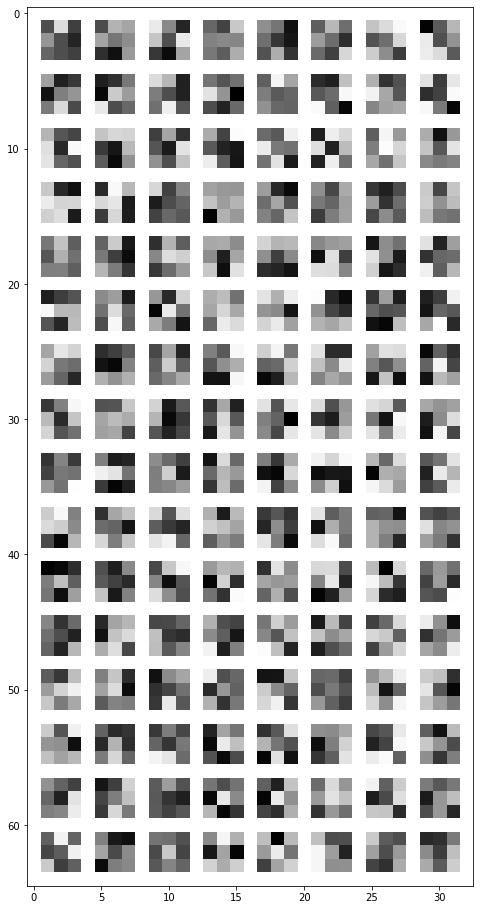

Visualization filters learned for layer: layer2


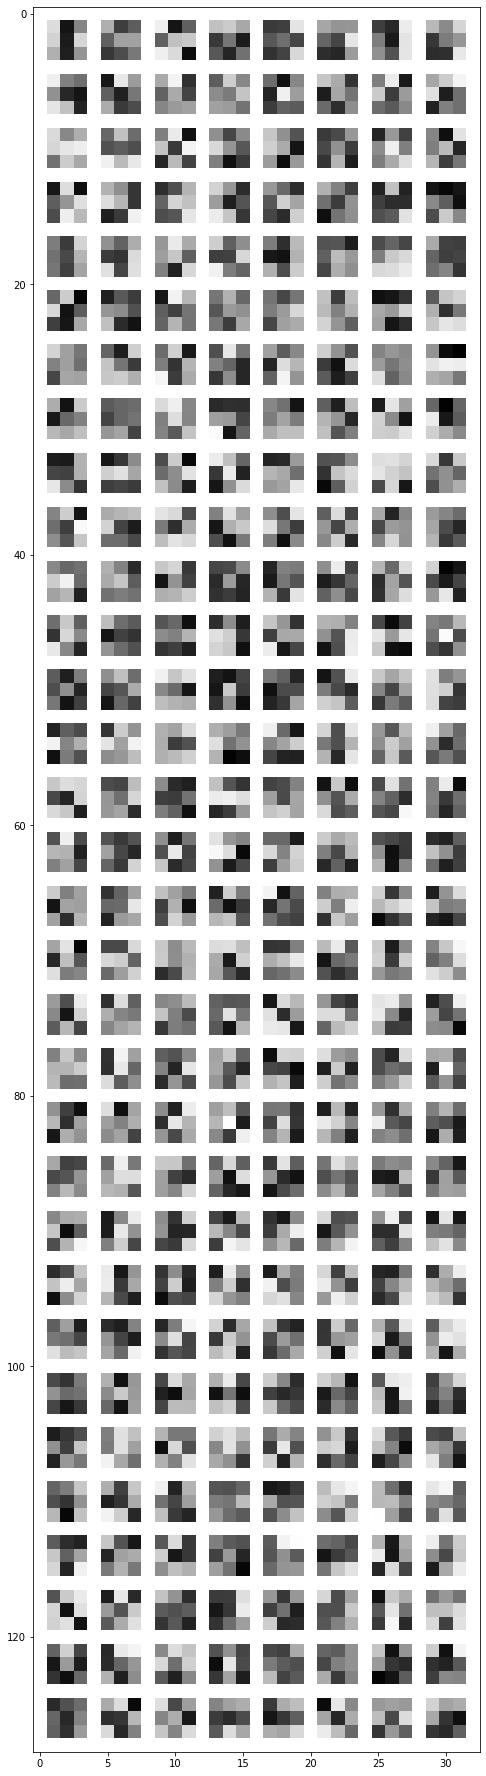

Visualization filters learned for layer: layer3


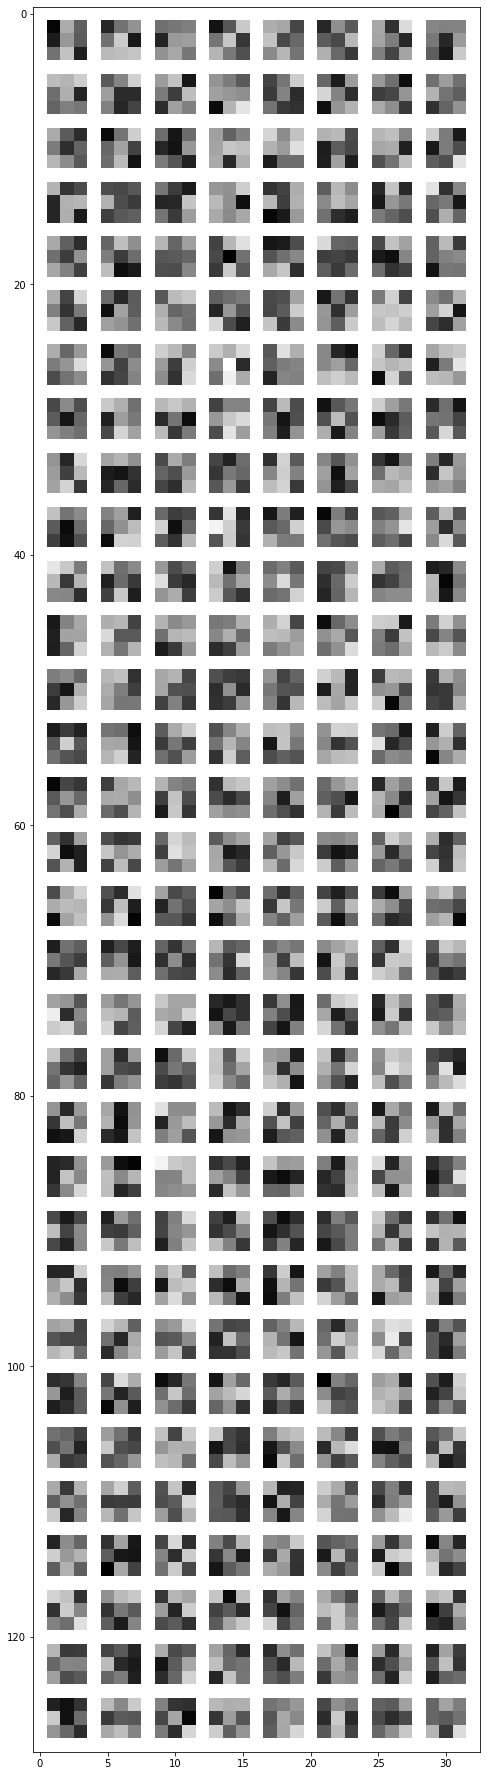

Visualization filters learned for layer: layer4


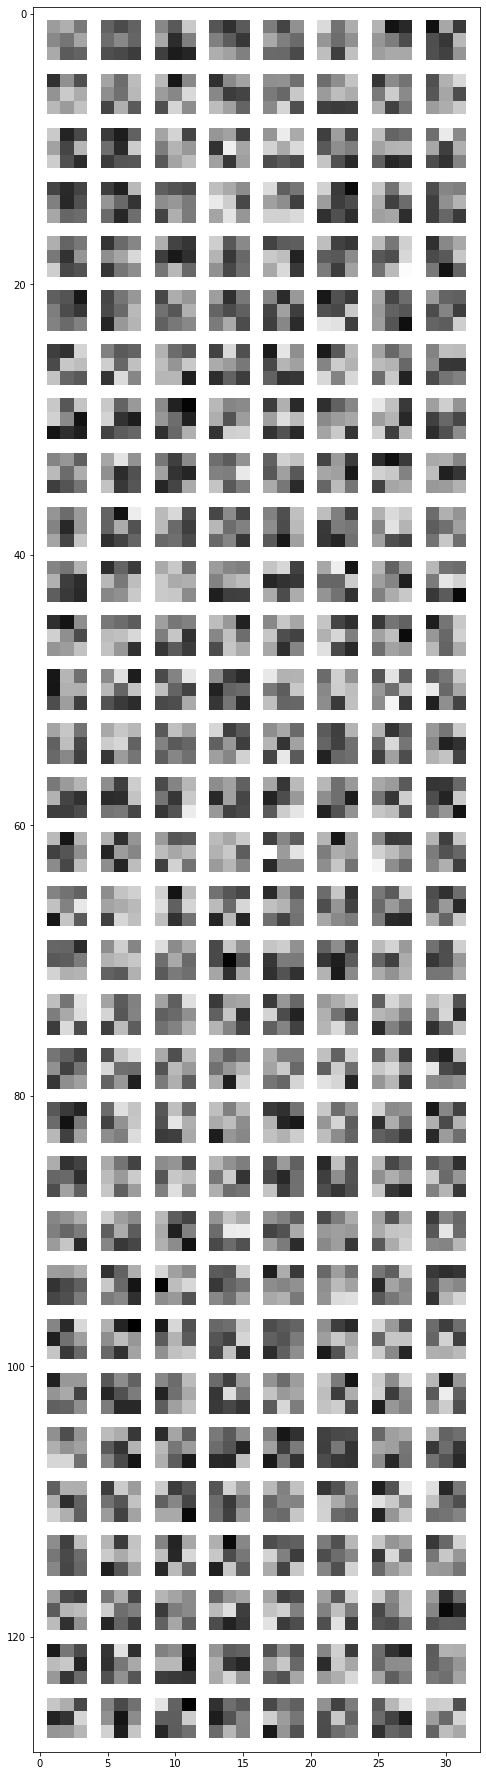

In [0]:
viz_filters(model_no_binary)

Visualization filters learned for layer: layer1


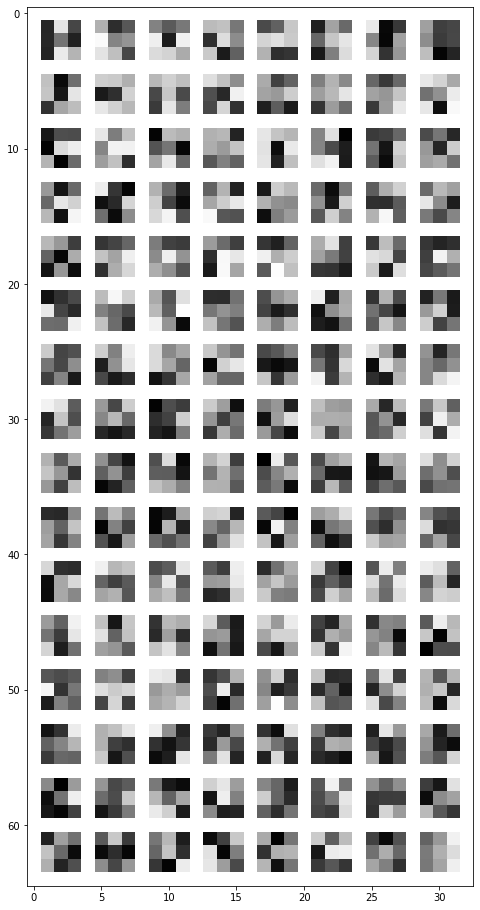

Visualization filters learned for layer: layer2


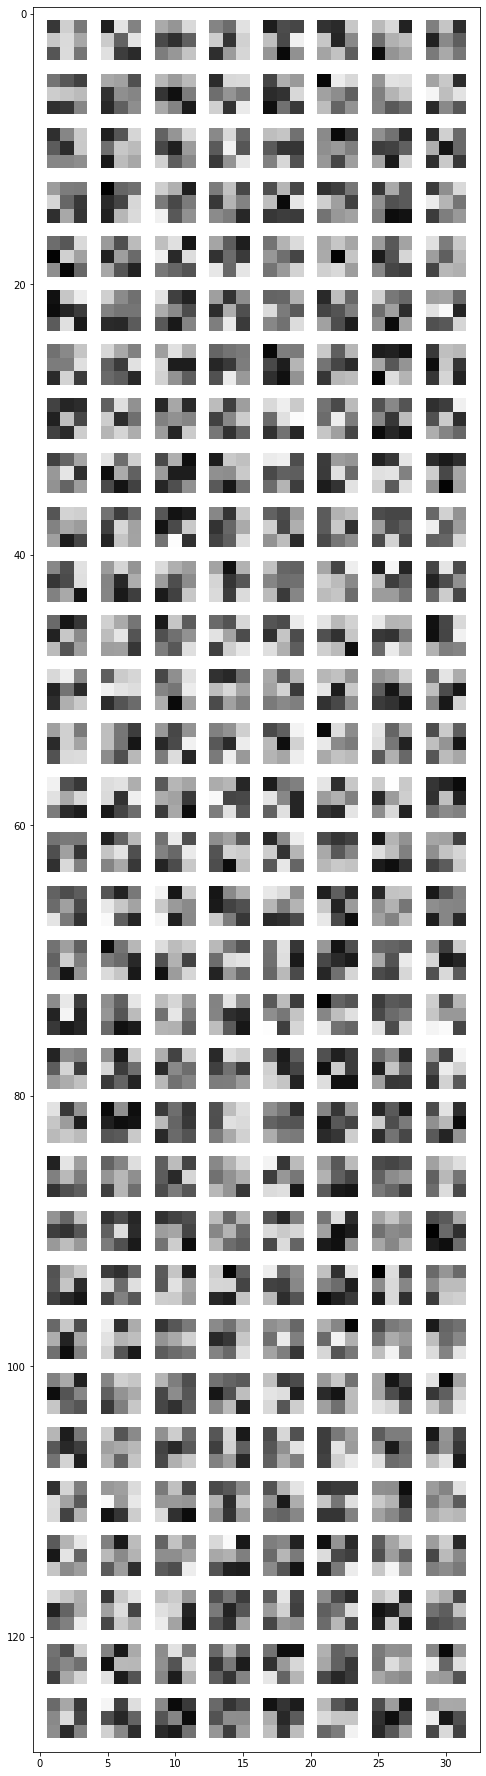

Visualization filters learned for layer: layer3


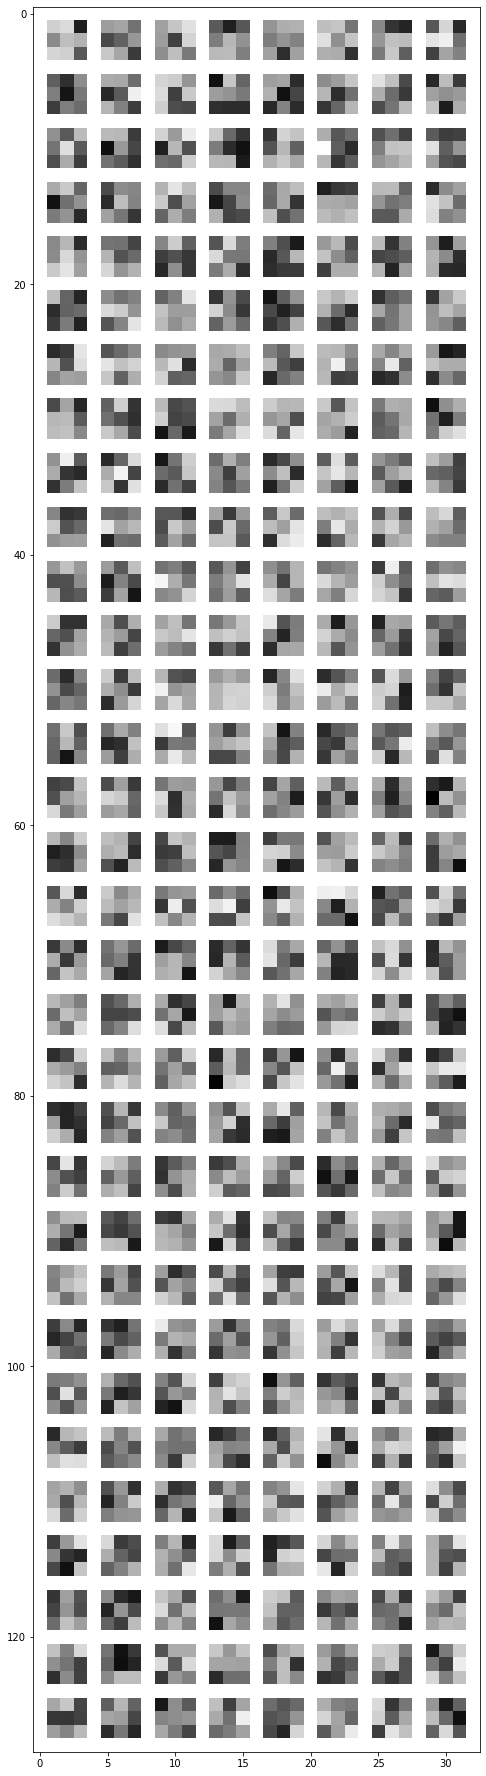

Visualization filters learned for layer: layer4


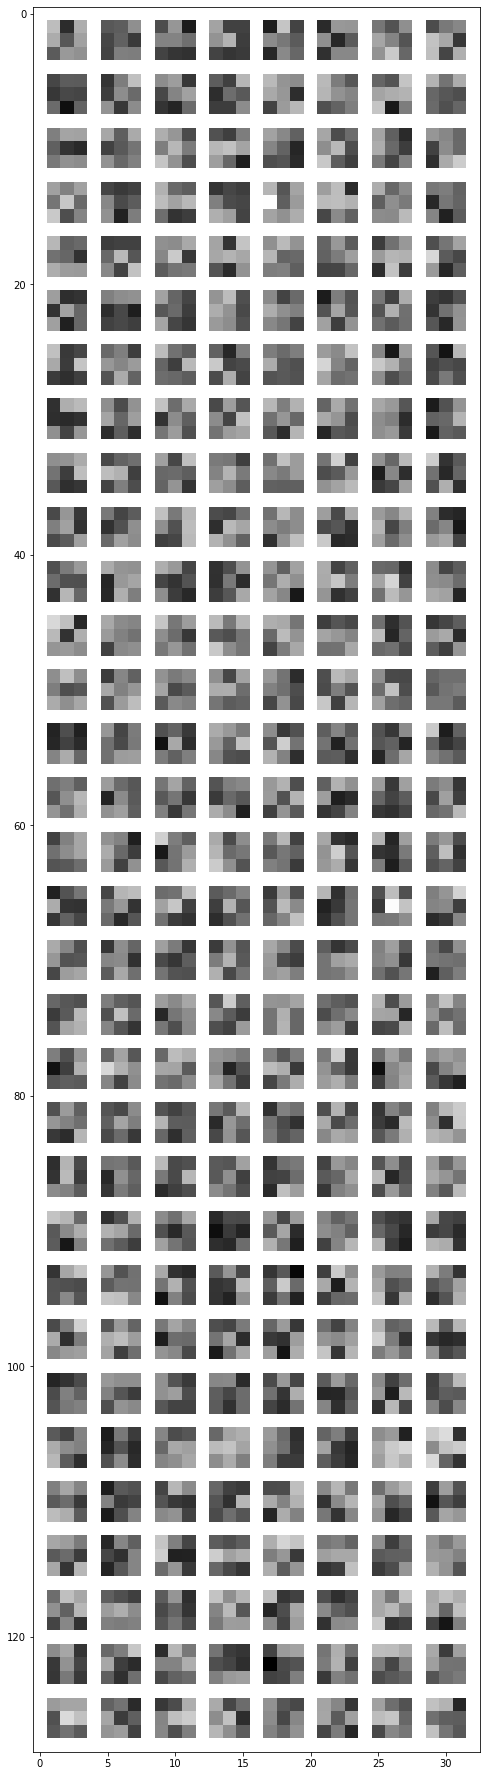

In [0]:
viz_filters(model_binary)

## Visualization image that maximizes a specific activation in a specific layer for a specifc filter:

### No binary model:

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=105, zoom=True, filter_size=3)
g_ascent_no_binary.use_gpu = True

In [0]:
conv1_no_binary = model_no_binary.layer1
# conv1_filters_no_binary = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]  
conv1_filters_no_binary = np.arange(128)
mean_gradient_layer1 = False
ind_x_layer1 = 25
ind_y_layer1 = 25

conv2_no_binary = model_no_binary.layer2
conv2_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer2 = False
ind_x_layer2 = 12
ind_y_layer2 = 12

conv3_no_binary = model_no_binary.layer3
conv3_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer3 = False
ind_x_layer3 = 6
ind_y_layer3 = 6

conv4_no_binary = model_no_binary.layer4
conv4_filters_no_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer4 = False
ind_x_layer4 = 3
ind_y_layer4 = 3

lr=0.001
num_iter=100
MNIST = False

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:325: UserWarning: Attempting to set identical left == right == 50 results in singular transformations; automatically expanding.
  ax.axis([xmin, xmax, ymin, ymax])
/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Binary_activations_V2/MNIST_Binary_V2/visualize/viz.py:325: UserWarning: Attempting to set identical bottom == top == 50 results in singular transformations; automatically expanding.
  ax.axis([xmin, xmax, ymin, ymax])


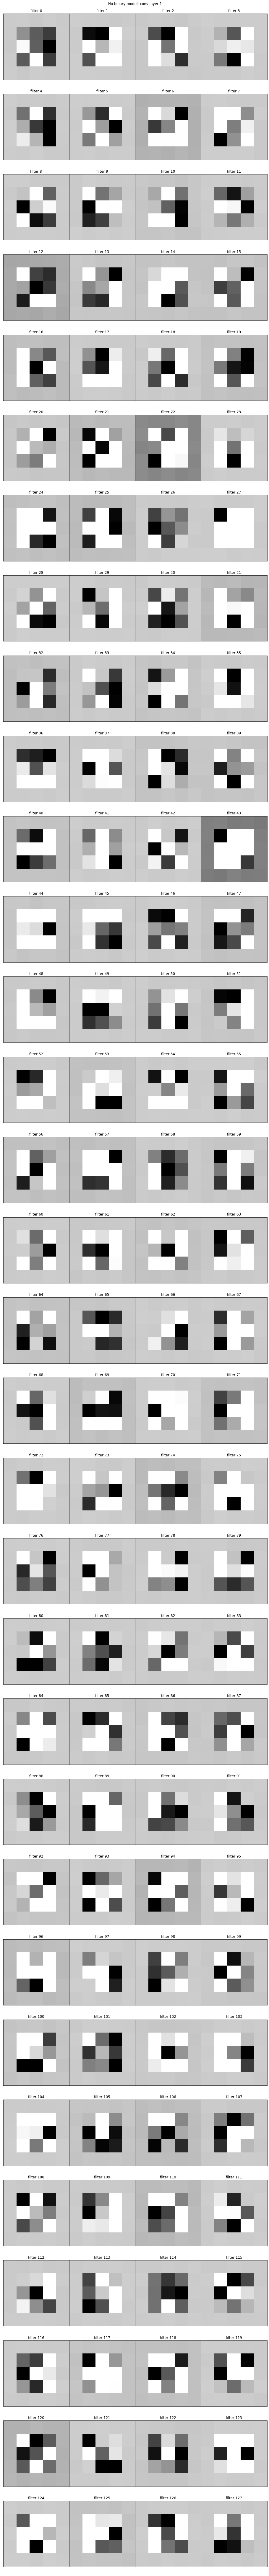

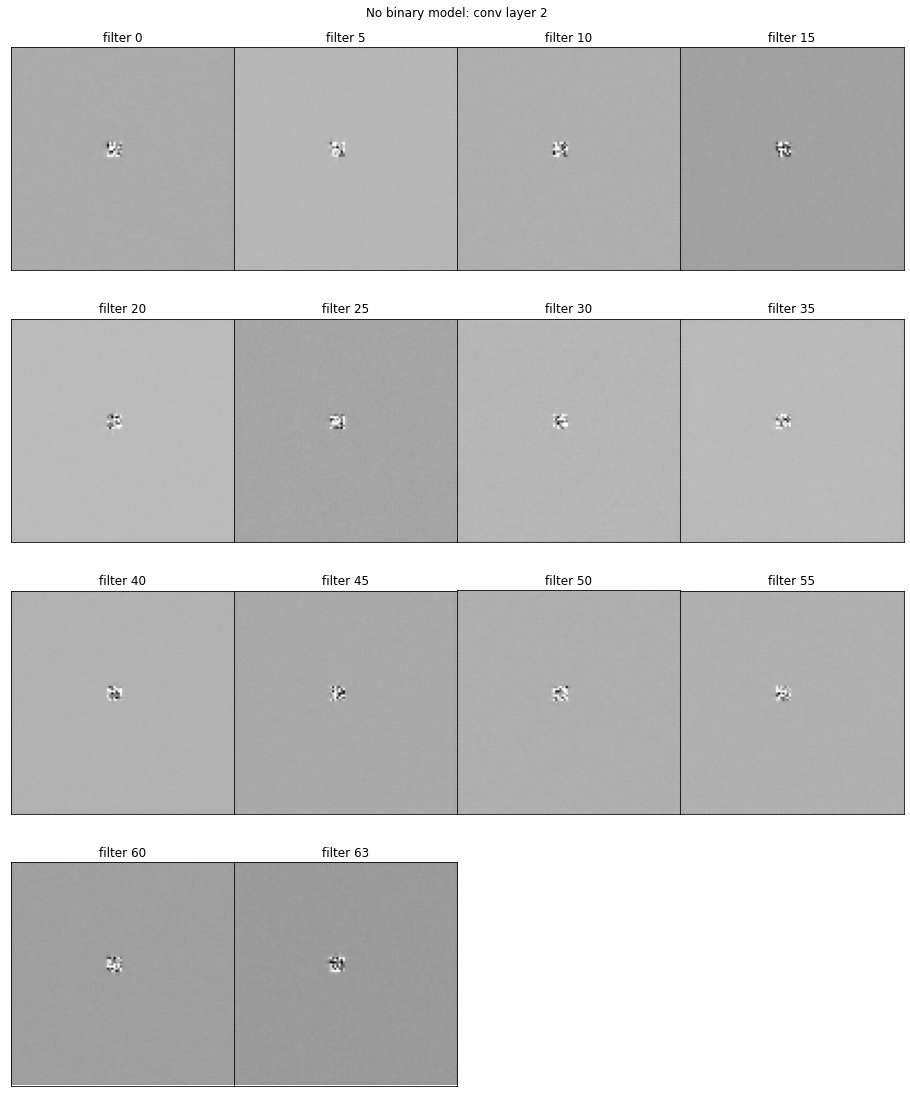

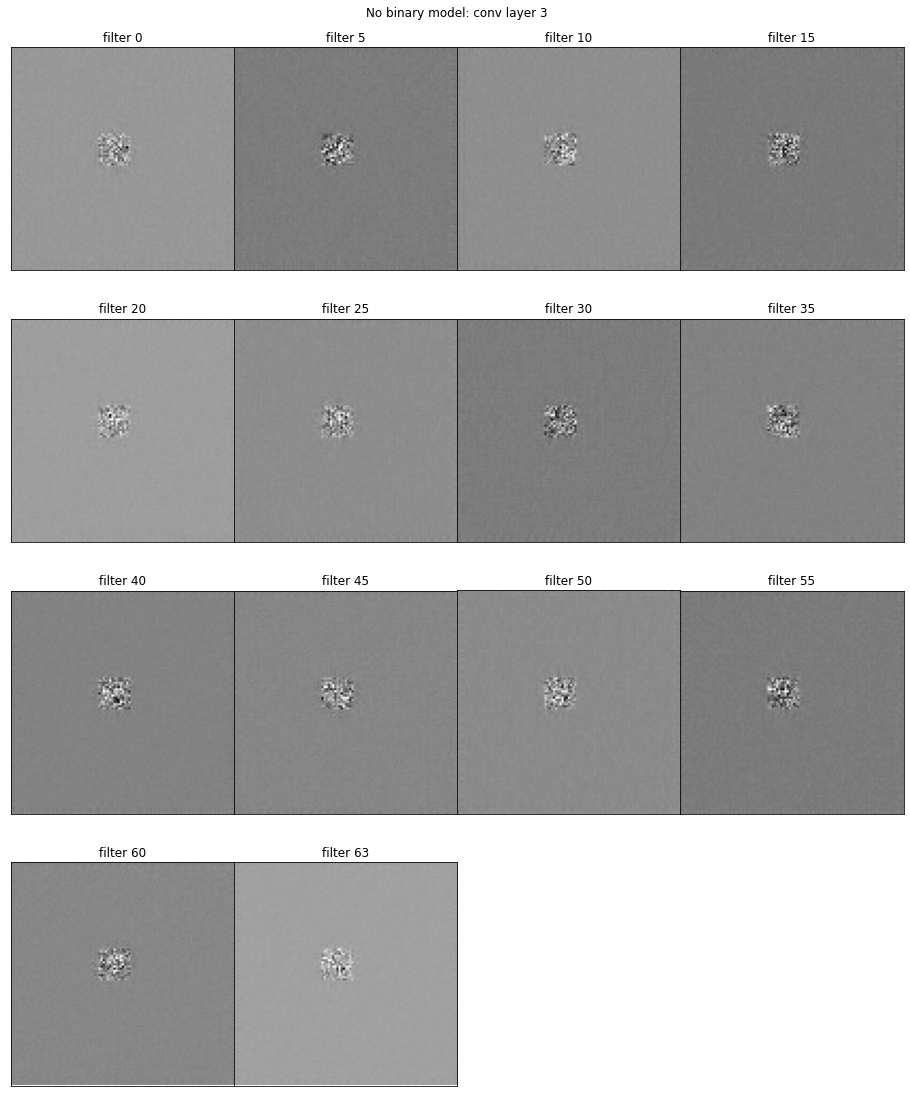

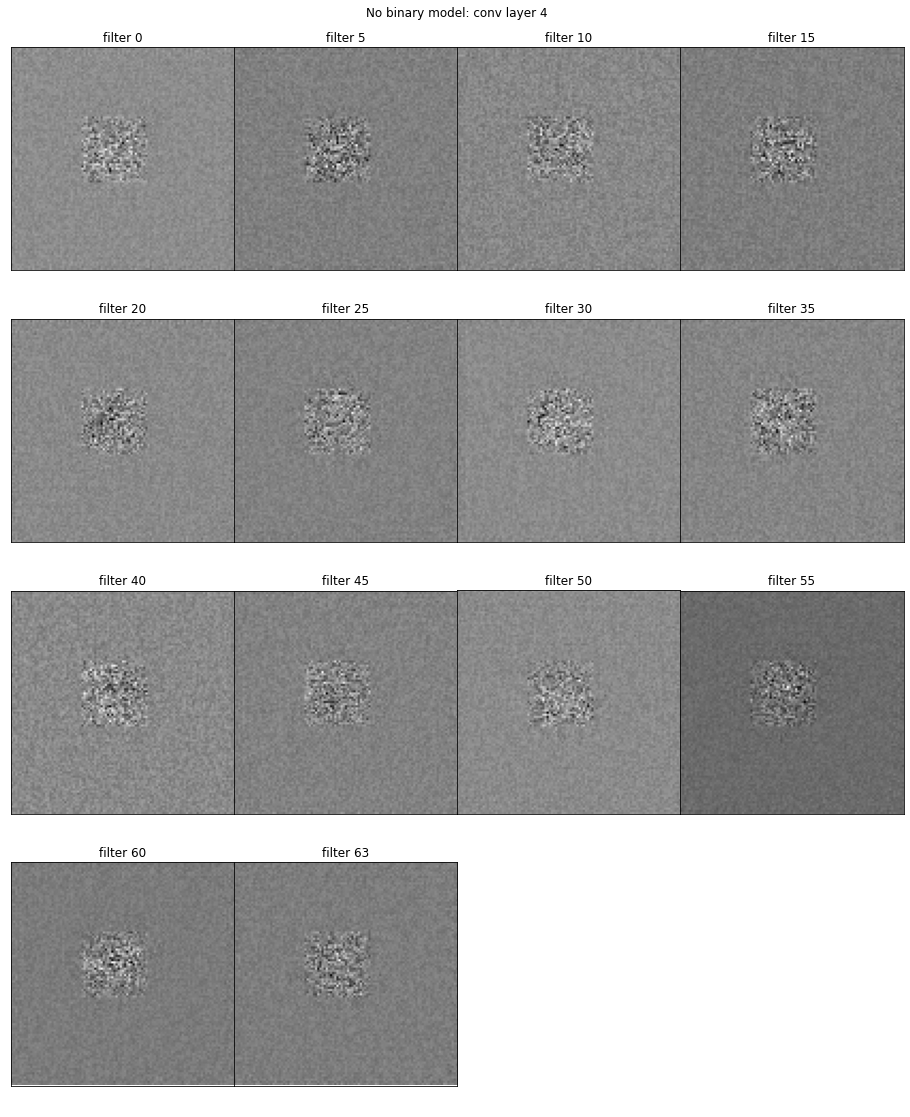

In [10]:
g_ascent_no_binary.visualize(conv1_no_binary, MNIST, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, lr=lr, num_iter=num_iter, title='No binary model: conv layer 1', first_conv_layer=True)
g_ascent_no_binary.visualize(conv2_no_binary, MNIST, conv2_filters_no_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, lr=lr, num_iter=num_iter, title='No binary model: conv layer 2')
g_ascent_no_binary.visualize(conv3_no_binary, MNIST, conv3_filters_no_binary, mean_gradient_layer3,
                             ind_x_layer3, ind_y_layer3, lr=lr, num_iter=num_iter, title='No binary model: conv layer 3')
g_ascent_no_binary.visualize(conv4_no_binary, MNIST, conv4_filters_no_binary, mean_gradient_layer4,
                             ind_x_layer4, ind_y_layer4, lr=lr, num_iter=num_iter, title='No binary model: conv layer 4')

### Binary model:

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=105, zoom=True, filter_size=3)
g_ascent_binary.use_gpu = True

In [0]:
conv1_binary = model_binary.layer1
# conv1_filters_binary = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
conv1_filters_binary = np.arange(128)
mean_gradient_layer1 = False
ind_x_layer1 = 25
ind_y_layer1 = 25

conv2_binary = model_binary.layer2
conv2_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer2 = False
ind_x_layer2 = 12
ind_y_layer2 = 12

conv3_binary = model_binary.layer3
conv3_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer3 = False
ind_x_layer3 = 6
ind_y_layer3 = 6

conv4_binary = model_binary.layer4
conv4_filters_binary =  [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
mean_gradient_layer4 = False
ind_x_layer4 = 3
ind_y_layer4 = 3

In [0]:
g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1', first_conv_layer=True)
g_ascent_binary.visualize(conv2_binary, conv2_filters_binary, mean_gradient_layer2,
                             ind_x_layer2, ind_y_layer2, title='Binary model: conv layer 2')
g_ascent_binary.visualize(conv3_binary, conv3_filters_binary, mean_gradient_layer3,
                             ind_x_layer3, ind_y_layer3, title='Binary model: conv layer 3')
g_ascent_binary.visualize(conv4_binary, conv4_filters_binary, mean_gradient_layer4,
                             ind_x_layer4, ind_y_layer4, title='Binary model: conv layer 4')

Output hidden; open in https://colab.research.google.com to view.

## Visuazation regions that maximizes a specific layer and filter:

### Run:

#### Modules:

In [0]:
def get_all_regions_max(loader, activations, len_img_h, len_img_w):

    dataiter = iter(loader)
    images, _ = dataiter.next()
    print('nb images: {}'.format(len(images)))

    print('begin extraction regions')
    region_final = {}
    activation_final = {}
    
    filter_layer2 = get_filter_layer2()
    filter_layer3 = get_filter_layer3()
    filter_layer4 = get_filter_layer4()

    for name, fm in activations.items():
      # for each image of fm 
      if name=='layer1':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 3, 3))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer2':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 7, 7))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer3':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 15, 15))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      if name=='layer4':
        regions_layer = np.zeros((fm.shape[0], fm.shape[1], 31, 31))
        activation_layer = np.zeros((fm.shape[0], fm.shape[1]))
      for j in range(fm.shape[0]):
          print('treating image n {}/{}, for layer: {}'.format(j, fm.shape[0], name))
          
          im = images[j].unsqueeze(0).numpy().squeeze()  # image i of batch batch: numpy array: (28,28)
          if name=='layer1':
            regions_im_j = np.zeros((fm.shape[1], 3, 3))  # initialise empty list of regions for batch batch
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer2':
            regions_im_j = np.zeros((fm.shape[1], 7, 7))
            regions_im_j = (regions_im_j*filter_layer2)/4
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer3':
            regions_im_j = np.zeros((fm.shape[1], 15, 15))
            regions_im_j = (regions_im_j*filter_layer3)/4
            activation_im_j = np.zeros((fm.shape[1]))
          if name=='layer4':
            regions_im_j = np.zeros((fm.shape[1], 31, 31))
            regions_im_j = (regions_im_j*filter_layer4)/4
            activation_im_j = np.zeros((fm.shape[1]))
          for i in range(fm.shape[1]):  # for all fm in image j
            act_max = max(fm[j][i].min(), fm[j][i].max(), key=abs)  # get max activation value in fm j
            ind_x = int((np.where(fm[j][i]==act_max)[0])[0])  # get index (x,y) of act_max
            ind_y = int((np.where(fm[j][i]==act_max)[1])[0])

            if name=='layer1':
              region = get_region_layer1(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer2':
              region = get_region_layer2(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer3':
              region = get_region_layer3(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            if name=='layer4':
              region = get_region_layer4(im, ind_x, ind_y, name, stride, padding, filter_size, len_img_h, len_img_w)
            
            regions_im_j[i] = region
            activation_im_j[i] = act_max.detach().numpy()
          regions_layer[j] = regions_im_j
          activation_layer[j] = activation_im_j
      region_final[name] = regions_layer
      activation_final[name] = activation_layer

    return region_final, activation_final

#### Extract and save regions and activations:

##### No binary model:

In [0]:
activations_no_binary = collections.defaultdict(list)

In [0]:
def save_activation_no_binary(name, mod, inp, out):
    activations_no_binary[name].append(out.cpu())

In [0]:
for name, m in model_no_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_no_binary, name))

for batch in train_loader:
  out = model_no_binary(batch[0])
  break  # for only one batch

activations_no_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_no_binary.items()}

for k,v in activations_no_binary.items():
      print (k, v.size())

In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 105
len_img_h = 105
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_no_binary, len_img_h, len_img_w)

region_layer1_no_binary = region_final['layer1']
region_layer2_no_binary = region_final['layer2']
region_layer3_no_binary = region_final['layer3']
region_layer4_no_binary = region_final['layer4']
activation_layer1_no_binary = activation_final['layer1']
activation_layer2_no_binary = activation_final['layer2']
activation_layer3_no_binary = activation_final['layer3']
activation_layer4_no_binary = activation_final['layer4']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(region_layer3_no_binary.shape)
print(region_layer4_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer3_no_binary.shape)
print(activation_layer4_no_binary.shape)

In [0]:
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer3.npy', region_layer3_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer4.npy', region_layer4_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer3.npy', activation_layer3_no_binary)
np.save('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer4.npy', activation_layer4_no_binary)

##### Binary model:

In [0]:
activations_binary = collections.defaultdict(list)

In [0]:
def save_activation_binary(name, mod, inp, out):
    activations_binary[name].append(out.cpu())

In [0]:
for name, m in model_binary.named_modules():
    if type(m)==nn.Conv2d:
      # partial to assign the layer name to each hook
      m.register_forward_hook(partial(save_activation_binary, name))

for batch in train_loader:
  out = model_binary(batch[0])
  break  # for only one batch

activations_binary = {name: torch.cat(outputs, 0) for name, outputs in activations_binary.items()}

for k,v in activations_binary.items():
      print (k, v.size())

In [0]:
stride = 2
padding = 1
filter_size = 3
len_img_w = 105
len_img_h = 105
loader = train_loader

region_final, activation_final = get_all_regions_max(loader, activations_binary, len_img_h, len_img_w)

region_layer1_binary = region_final['layer1']
region_layer2_binary = region_final['layer2']
region_layer3_binary = region_final['layer3']
region_layer4_binary = region_final['layer4']
activation_layer1_binary = activation_final['layer1']
activation_layer2_binary = activation_final['layer2']
activation_layer3_binary = activation_final['layer3']
activation_layer4_binary = activation_final['layer4']

print(region_layer1_no_binary.shape)
print(region_layer2_no_binary.shape)
print(region_layer3_no_binary.shape)
print(region_layer4_no_binary.shape)
print(activation_layer1_no_binary.shape)
print(activation_layer2_no_binary.shape)
print(activation_layer3_no_binary.shape)
print(activation_layer4_no_binary.shape)

In [0]:
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer1.npy', region_layer1_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer2.npy', region_layer2_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer3.npy', region_layer3_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer4.npy', region_layer4_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer1.npy', activation_layer1_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer2.npy', activation_layer2_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer3.npy', activation_layer3_no_binary)
np.save('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer4.npy', activation_layer4_no_binary)

### Visualize max regions:

#### Load regions and activations:

In [0]:
region_layer1_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer1.npy', allow_pickle=True)
region_layer2_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer2.npy', allow_pickle=True)
region_layer3_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer3.npy', allow_pickle=True)
region_layer4_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_regions_max_layer4.npy', allow_pickle=True)

activation_layer1_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer2.npy', allow_pickle=True)
activation_layer3_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer3.npy', allow_pickle=True)
activation_layer4_no_binary = np.load('results/Omniglot_results/regions/No_binary_Omnilgot_activations_max_layer4.npy', allow_pickle=True)

In [0]:
region_layer1_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer1.npy', allow_pickle=True)
region_layer2_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer2.npy', allow_pickle=True)
region_layer3_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer3.npy', allow_pickle=True)
region_layer4_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_regions_max_layer4.npy', allow_pickle=True)

activation_layer1_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer1.npy', allow_pickle=True)
activation_layer2_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer2.npy', allow_pickle=True)
activation_layer3_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer3.npy', allow_pickle=True)
activation_layer4_binary = np.load('results/Omniglot_results/regions/Binary_Omnilgot_activations_max_layer4.npy', allow_pickle=True)

#### Viz:

##### No binary model layer1:

In [0]:
# parameters
list_filter_interest_layer1 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage=percentage, list_filter=list_filter_interest_layer1)

##### No binary model layer2:

Interest of filters: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 63]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


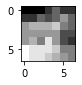

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


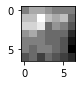

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


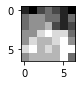

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


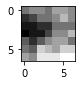

mean regions of 100 regions more=True or worst=False active for filter number: 20 :


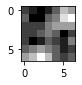

mean regions of 100 regions more=True or worst=False active for filter number: 25 :


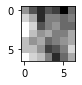

mean regions of 100 regions more=True or worst=False active for filter number: 30 :


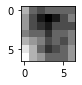

mean regions of 100 regions more=True or worst=False active for filter number: 35 :


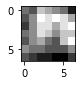

mean regions of 100 regions more=True or worst=False active for filter number: 40 :


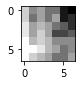

mean regions of 100 regions more=True or worst=False active for filter number: 45 :


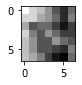

mean regions of 100 regions more=True or worst=False active for filter number: 50 :


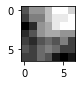

mean regions of 100 regions more=True or worst=False active for filter number: 55 :


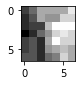

mean regions of 100 regions more=True or worst=False active for filter number: 60 :


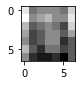

mean regions of 100 regions more=True or worst=False active for filter number: 63 :


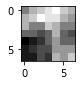

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


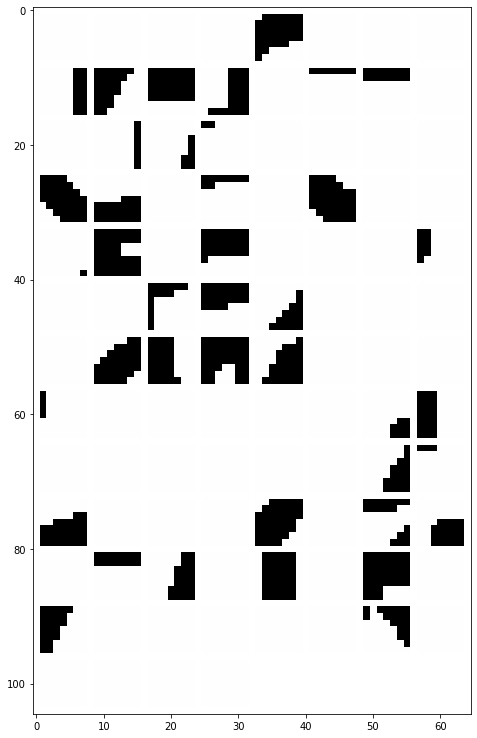

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


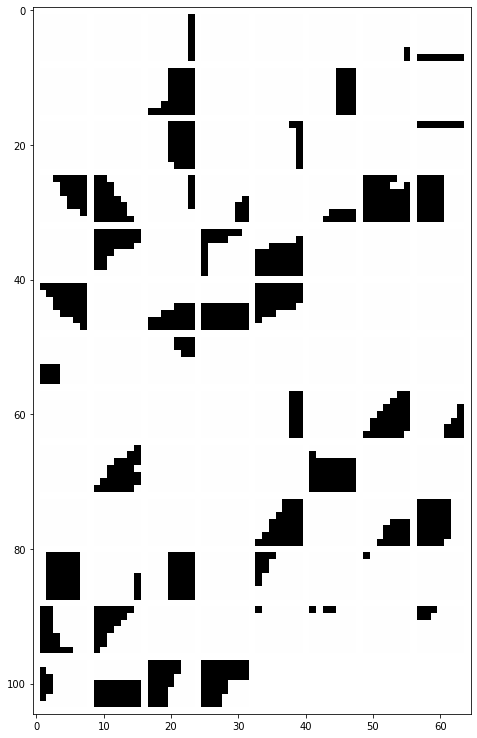

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


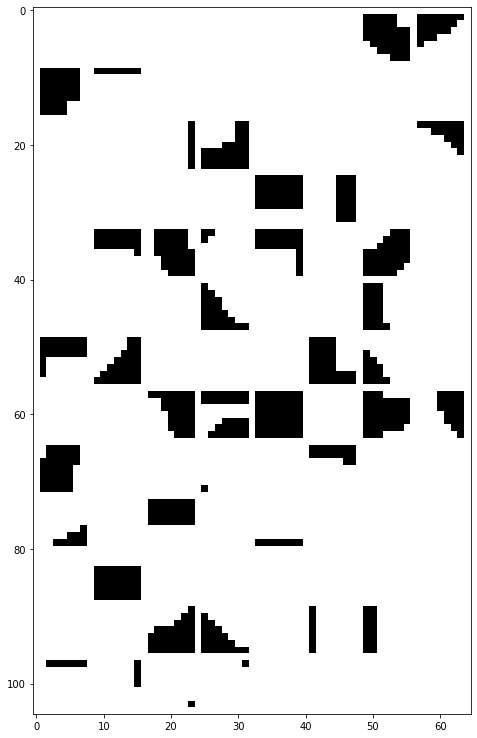

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


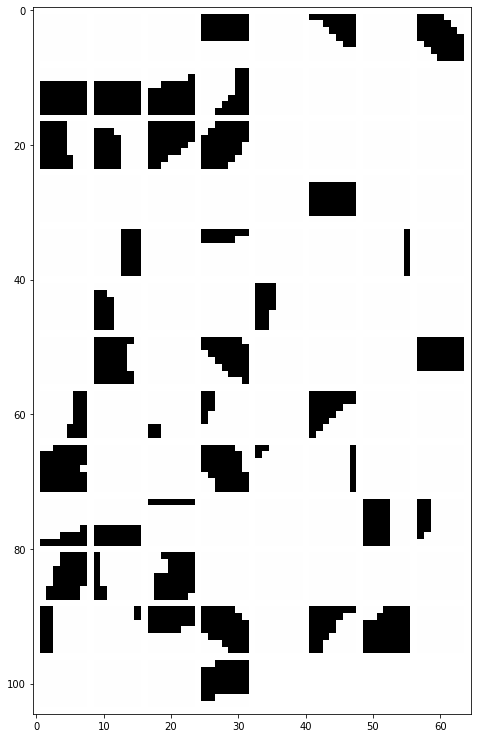

grid regions of 100 regions more=True or worst=False active for filter number: 20 :


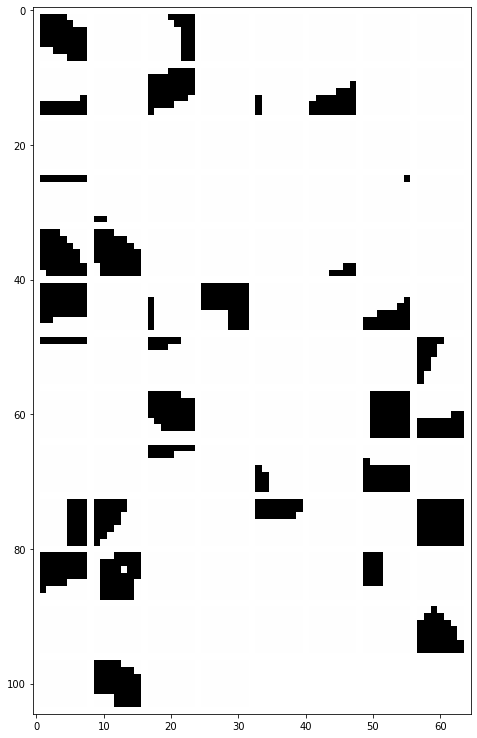

grid regions of 100 regions more=True or worst=False active for filter number: 25 :


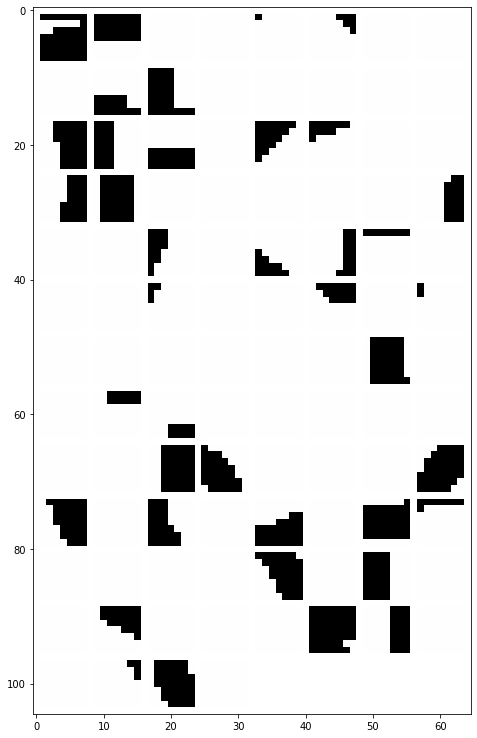

grid regions of 100 regions more=True or worst=False active for filter number: 30 :


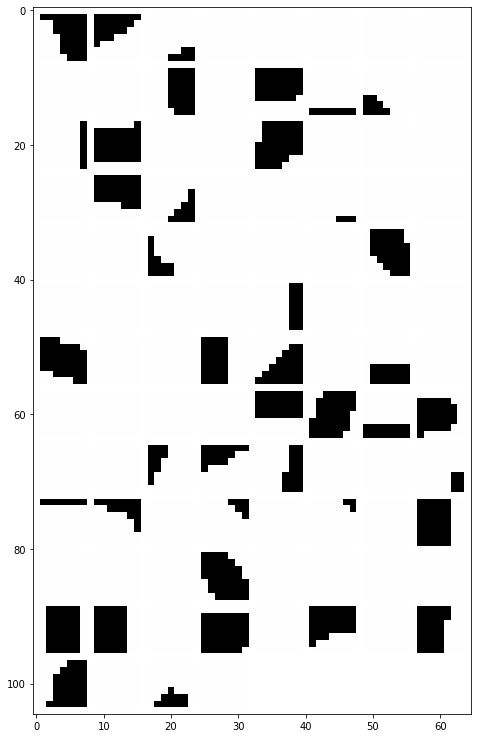

grid regions of 100 regions more=True or worst=False active for filter number: 35 :


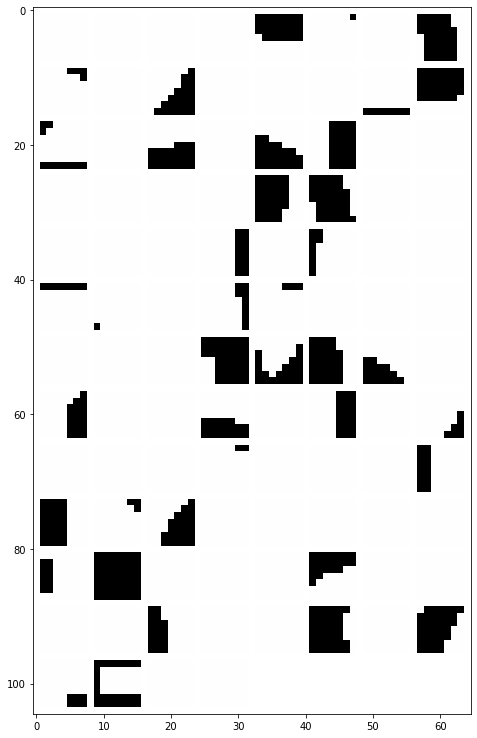

grid regions of 100 regions more=True or worst=False active for filter number: 40 :


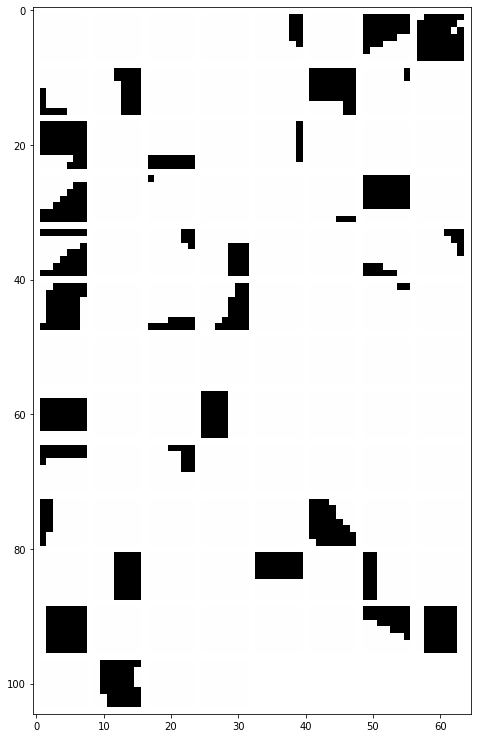

grid regions of 100 regions more=True or worst=False active for filter number: 45 :


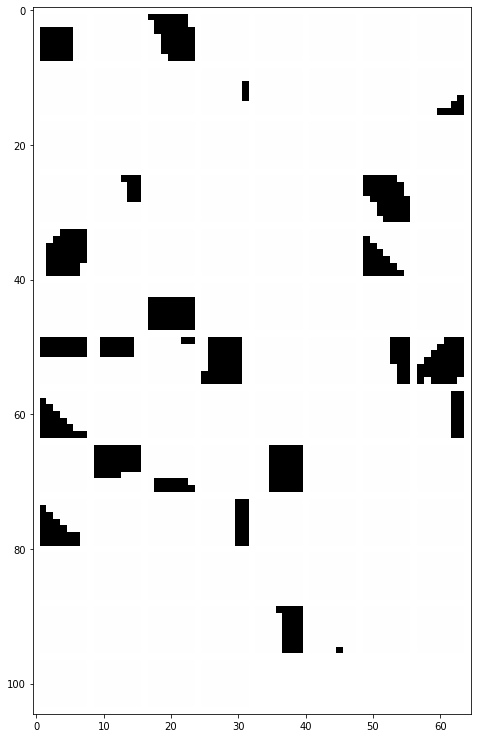

grid regions of 100 regions more=True or worst=False active for filter number: 50 :


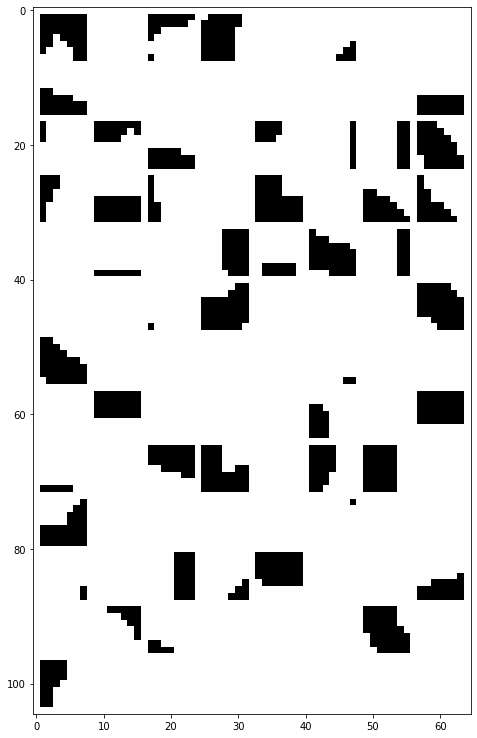

grid regions of 100 regions more=True or worst=False active for filter number: 55 :


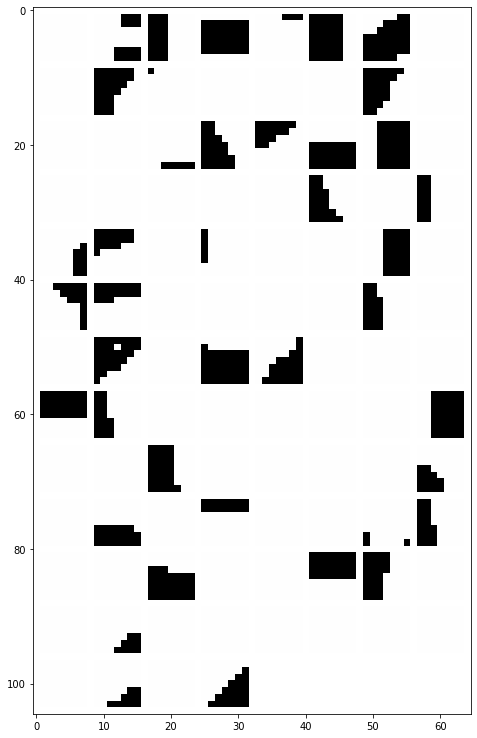

grid regions of 100 regions more=True or worst=False active for filter number: 60 :


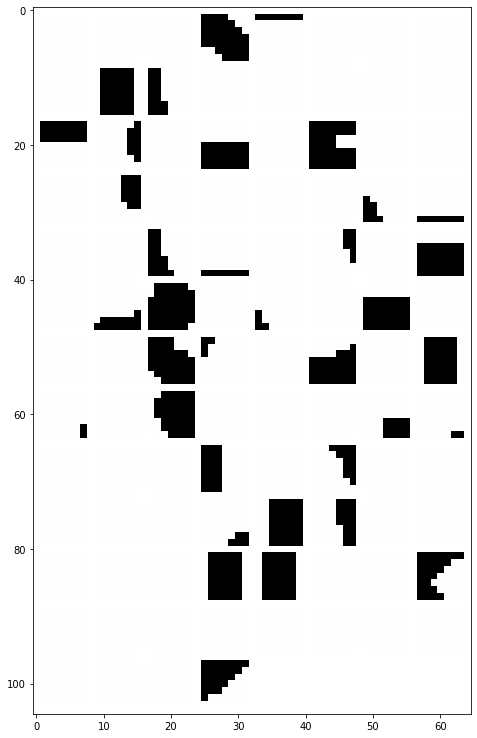

grid regions of 100 regions more=True or worst=False active for filter number: 63 :


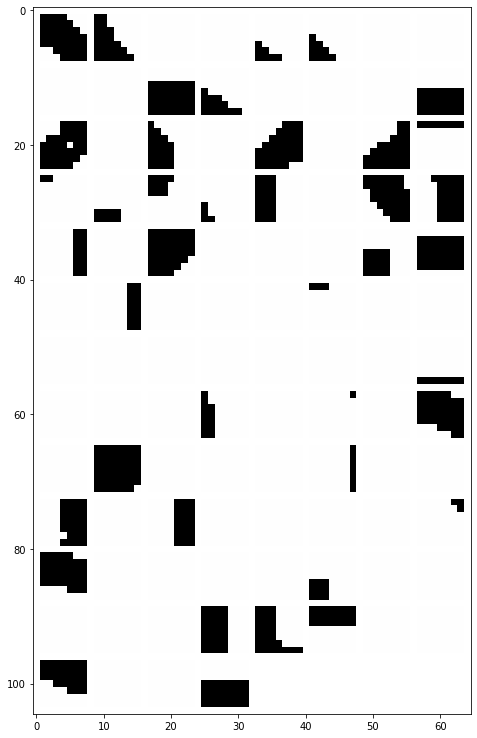

In [0]:
# parameters
list_filter_interest_layer2 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_no_binary
activations = activation_layer2_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

##### No binary model layer3:

Interest of filters: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 63]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


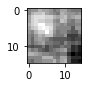

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


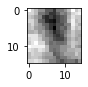

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


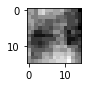

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


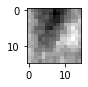

mean regions of 100 regions more=True or worst=False active for filter number: 20 :


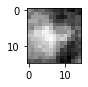

mean regions of 100 regions more=True or worst=False active for filter number: 25 :


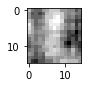

mean regions of 100 regions more=True or worst=False active for filter number: 30 :


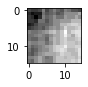

mean regions of 100 regions more=True or worst=False active for filter number: 35 :


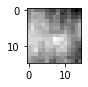

mean regions of 100 regions more=True or worst=False active for filter number: 40 :


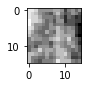

mean regions of 100 regions more=True or worst=False active for filter number: 45 :


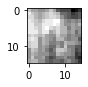

mean regions of 100 regions more=True or worst=False active for filter number: 50 :


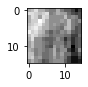

mean regions of 100 regions more=True or worst=False active for filter number: 55 :


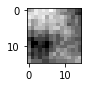

mean regions of 100 regions more=True or worst=False active for filter number: 60 :


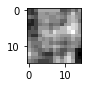

mean regions of 100 regions more=True or worst=False active for filter number: 63 :


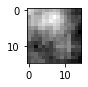

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


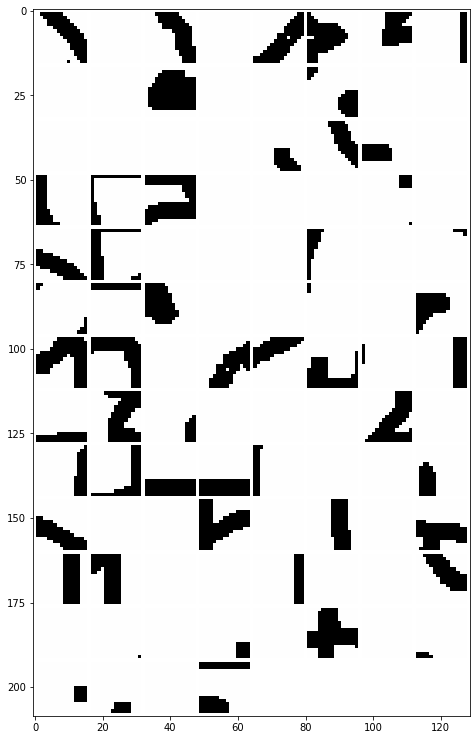

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


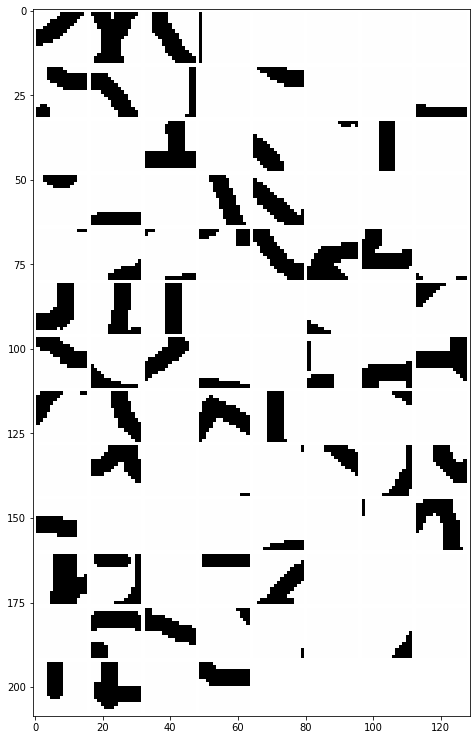

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


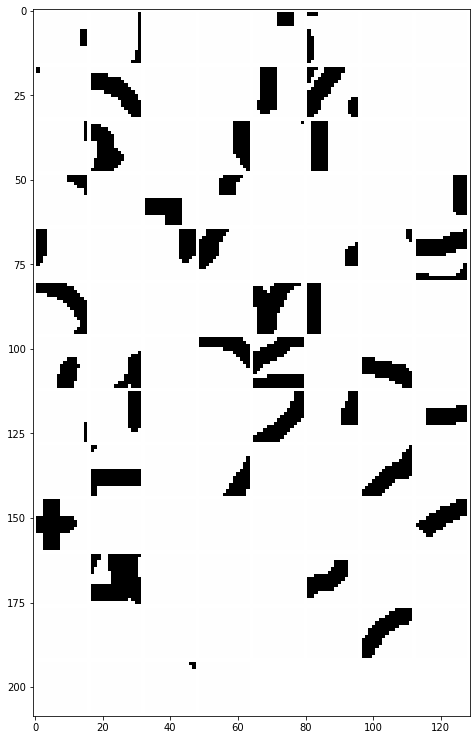

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


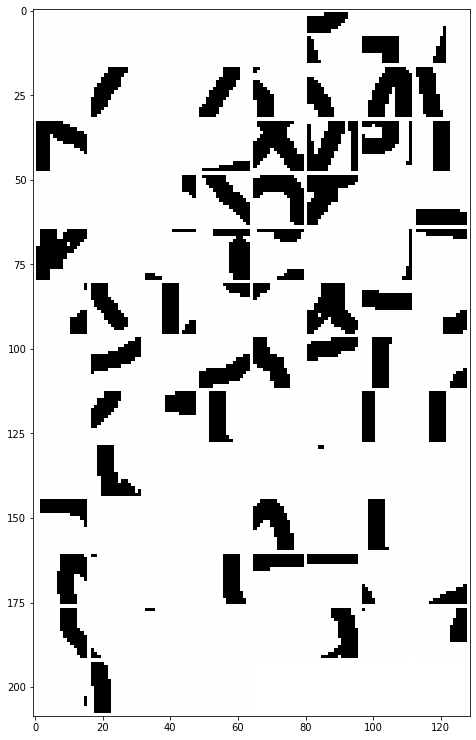

grid regions of 100 regions more=True or worst=False active for filter number: 20 :


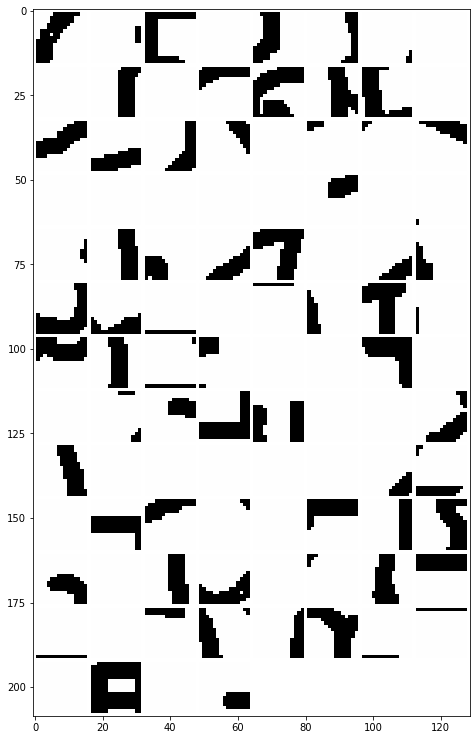

grid regions of 100 regions more=True or worst=False active for filter number: 25 :


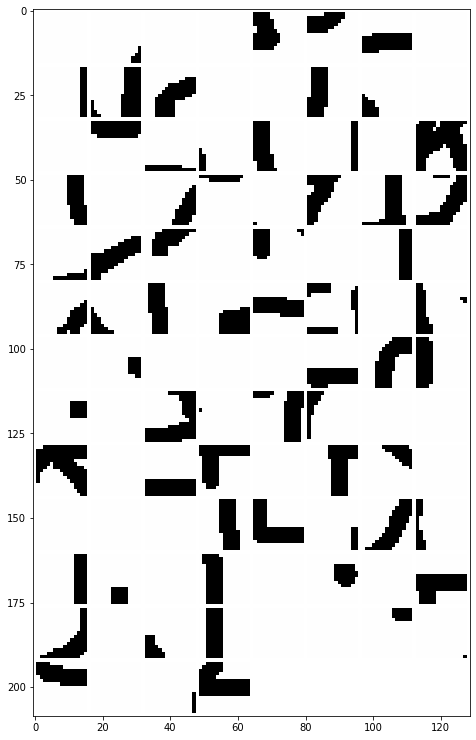

grid regions of 100 regions more=True or worst=False active for filter number: 30 :


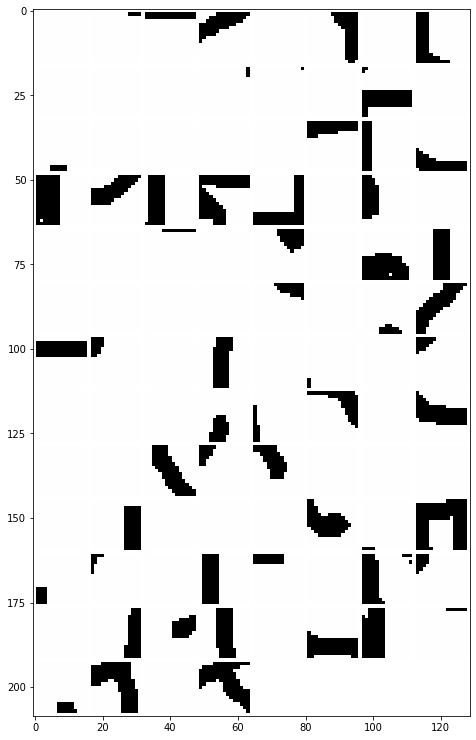

grid regions of 100 regions more=True or worst=False active for filter number: 35 :


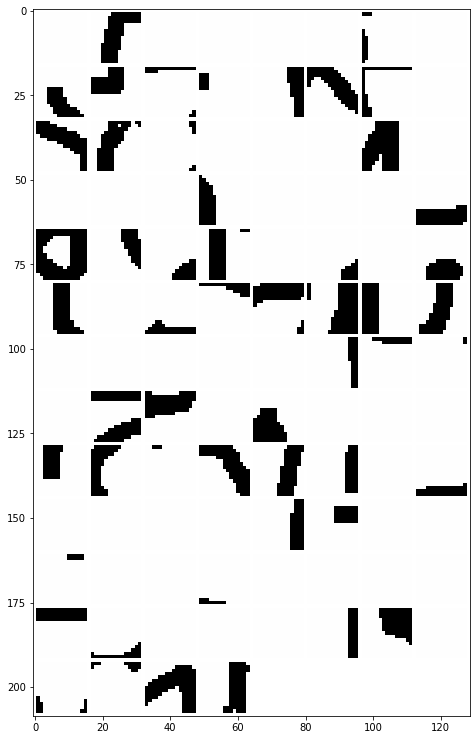

grid regions of 100 regions more=True or worst=False active for filter number: 40 :


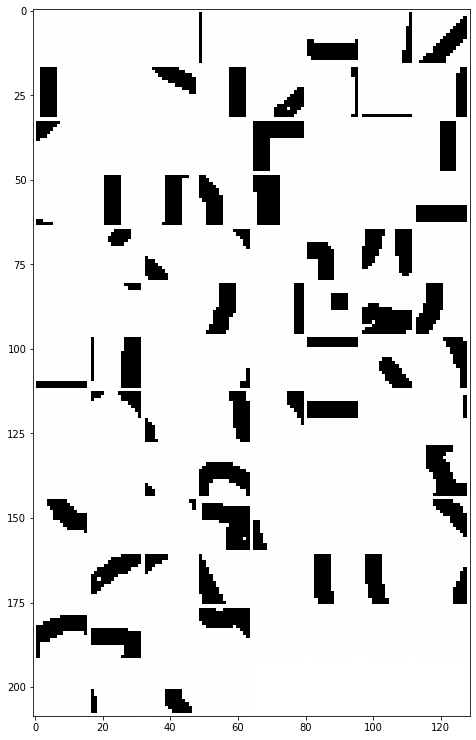

grid regions of 100 regions more=True or worst=False active for filter number: 45 :


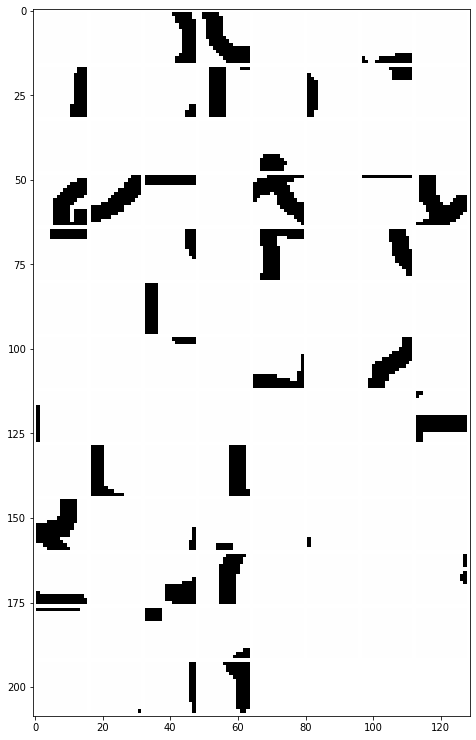

grid regions of 100 regions more=True or worst=False active for filter number: 50 :


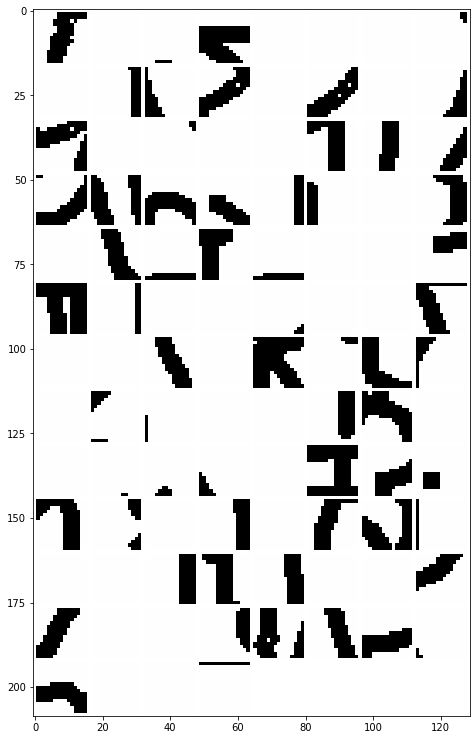

grid regions of 100 regions more=True or worst=False active for filter number: 55 :


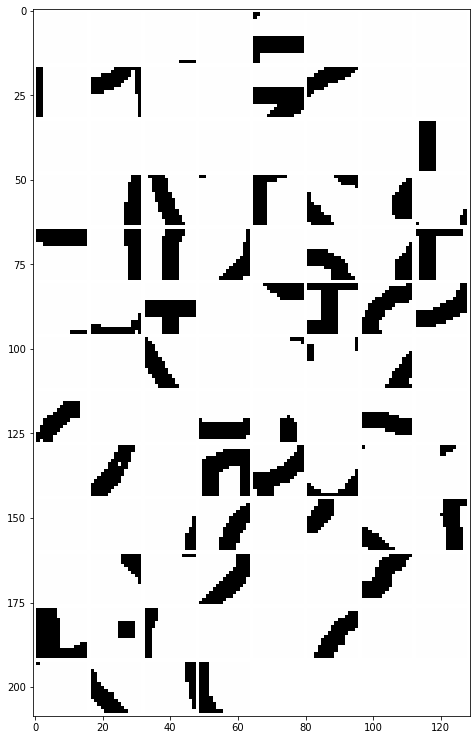

grid regions of 100 regions more=True or worst=False active for filter number: 60 :


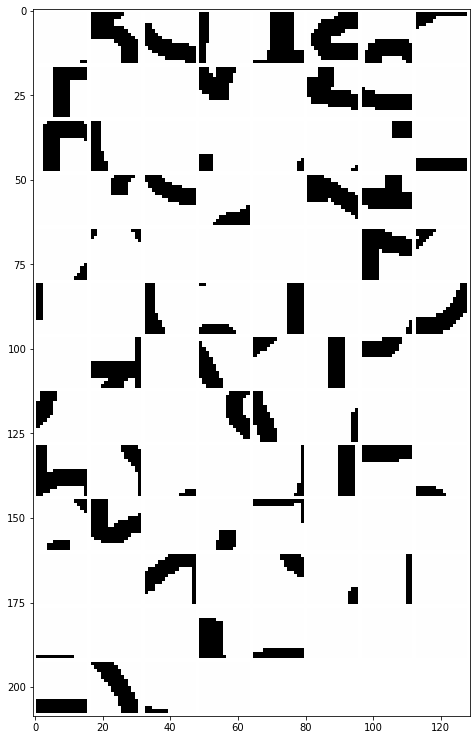

grid regions of 100 regions more=True or worst=False active for filter number: 63 :


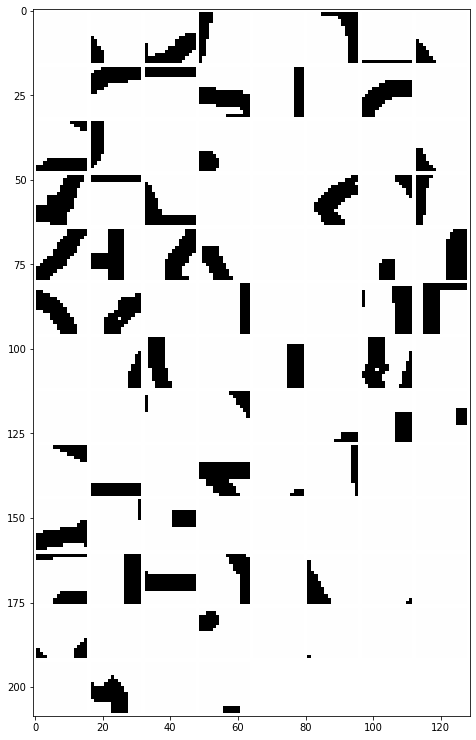

In [0]:
# parameters
list_filter_interest_layer3 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer3_no_binary
activations = activation_layer3_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer3)

##### No binary model layer4:

Interest of filters: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 63]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


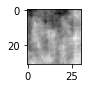

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


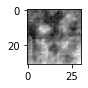

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


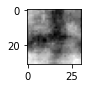

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


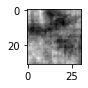

mean regions of 100 regions more=True or worst=False active for filter number: 20 :


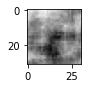

mean regions of 100 regions more=True or worst=False active for filter number: 25 :


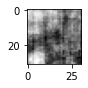

mean regions of 100 regions more=True or worst=False active for filter number: 30 :


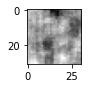

mean regions of 100 regions more=True or worst=False active for filter number: 35 :


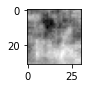

mean regions of 100 regions more=True or worst=False active for filter number: 40 :


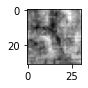

mean regions of 100 regions more=True or worst=False active for filter number: 45 :


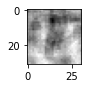

mean regions of 100 regions more=True or worst=False active for filter number: 50 :


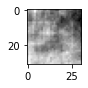

mean regions of 100 regions more=True or worst=False active for filter number: 55 :


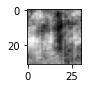

mean regions of 100 regions more=True or worst=False active for filter number: 60 :


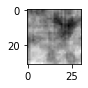

mean regions of 100 regions more=True or worst=False active for filter number: 63 :


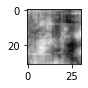

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


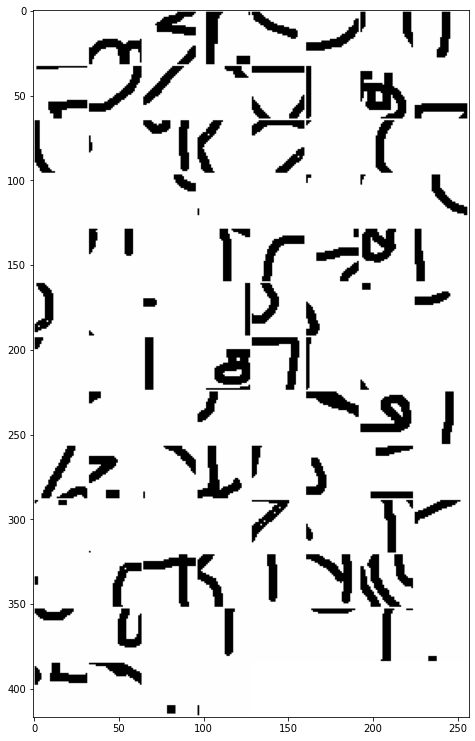

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


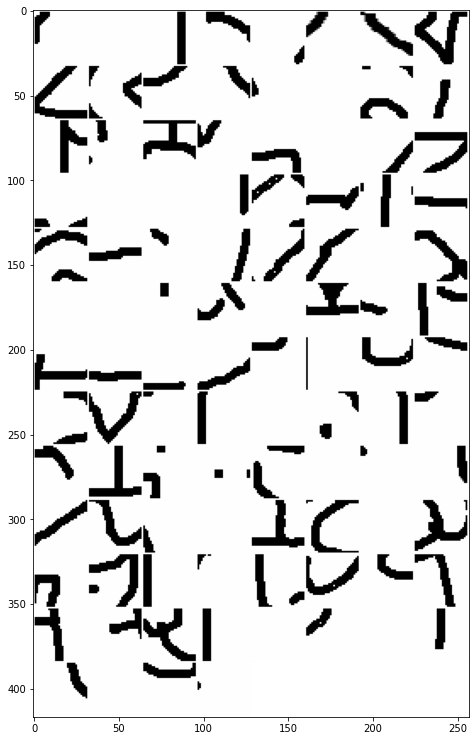

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


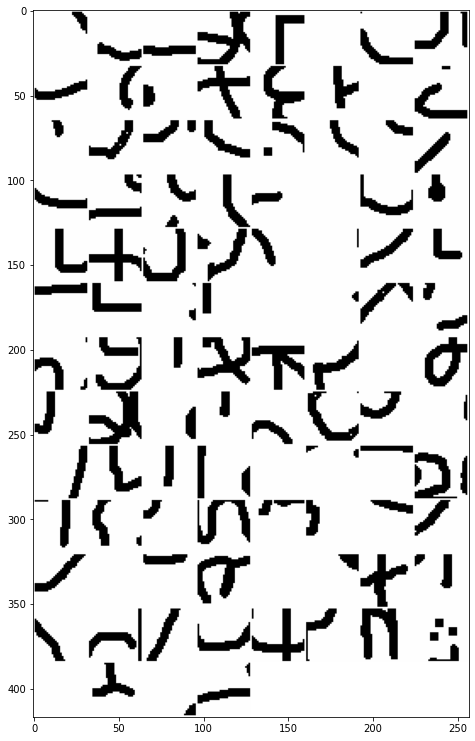

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


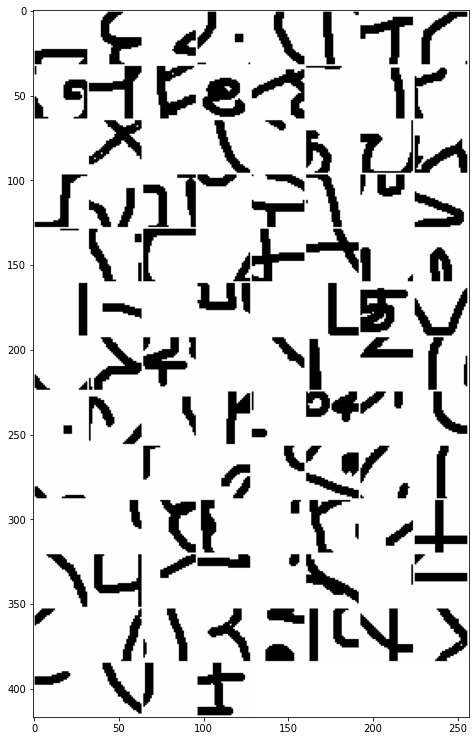

grid regions of 100 regions more=True or worst=False active for filter number: 20 :


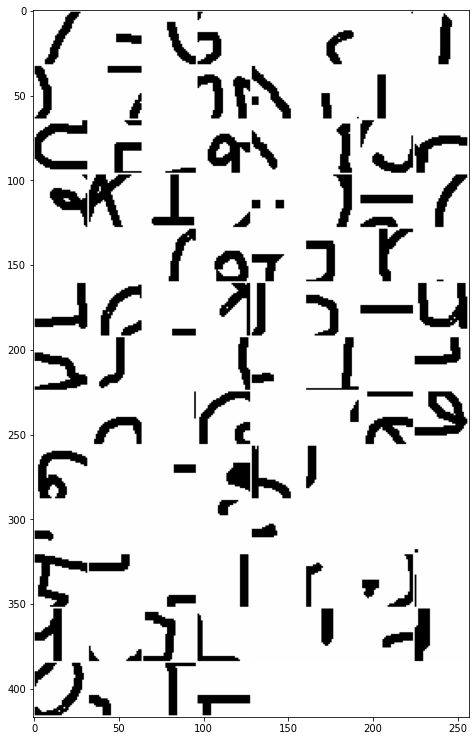

grid regions of 100 regions more=True or worst=False active for filter number: 25 :


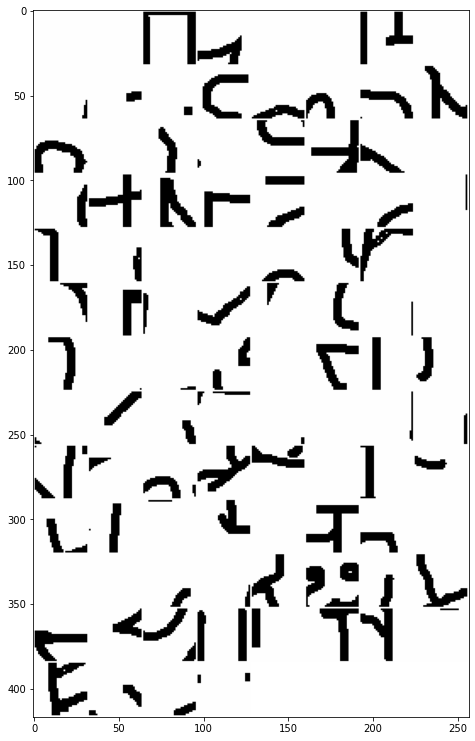

grid regions of 100 regions more=True or worst=False active for filter number: 30 :


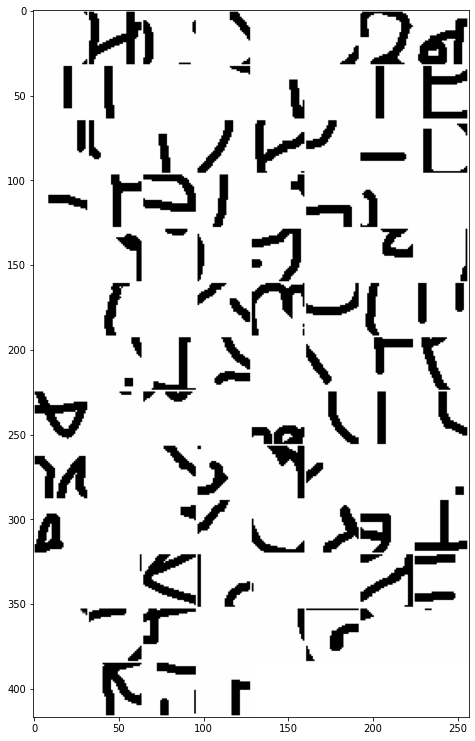

grid regions of 100 regions more=True or worst=False active for filter number: 35 :


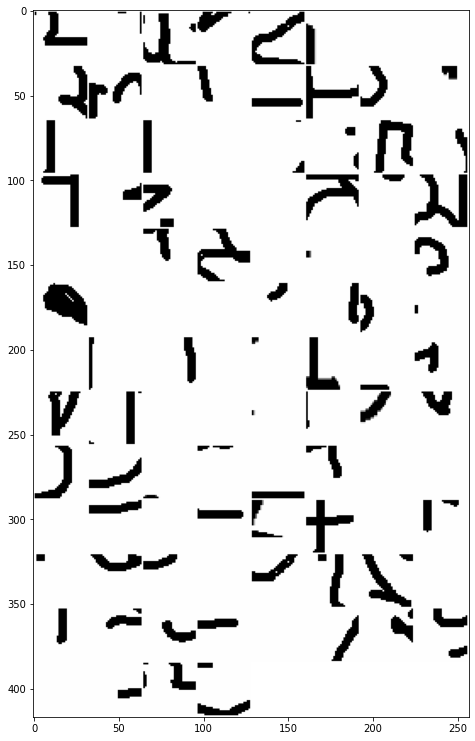

grid regions of 100 regions more=True or worst=False active for filter number: 40 :


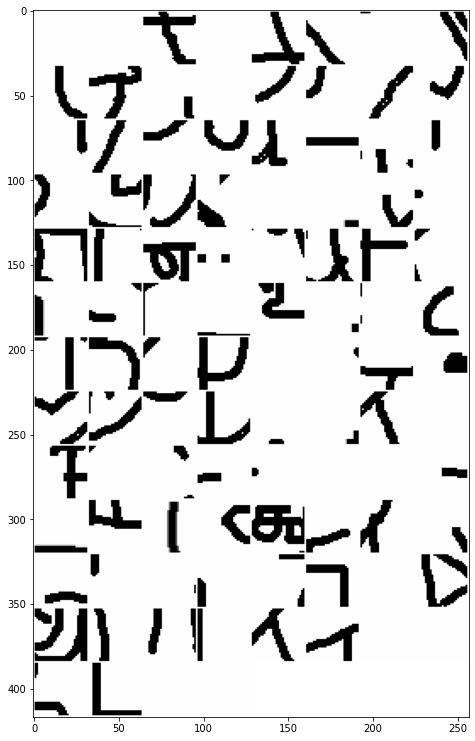

grid regions of 100 regions more=True or worst=False active for filter number: 45 :


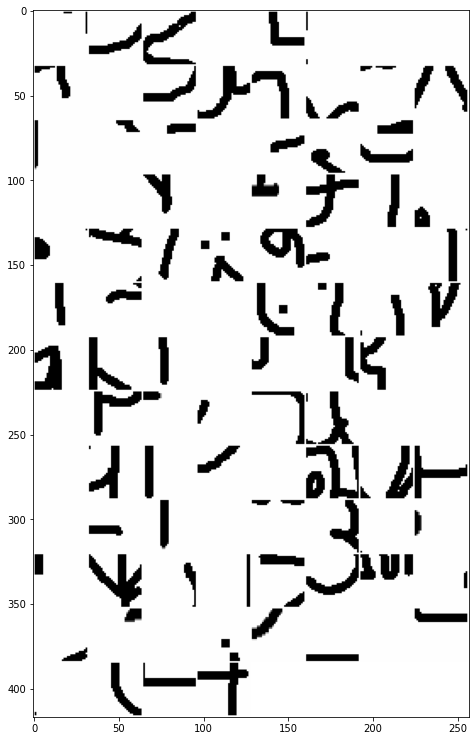

grid regions of 100 regions more=True or worst=False active for filter number: 50 :


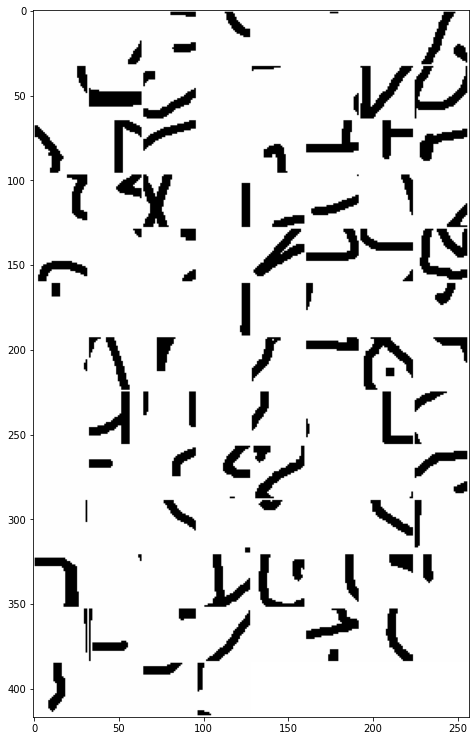

grid regions of 100 regions more=True or worst=False active for filter number: 55 :


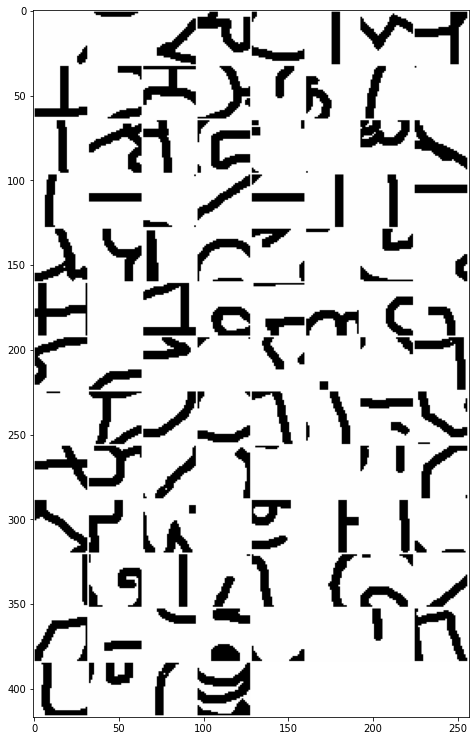

grid regions of 100 regions more=True or worst=False active for filter number: 60 :


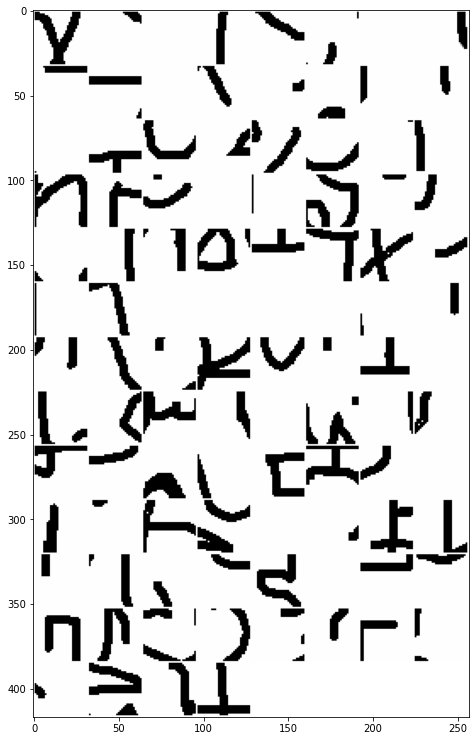

grid regions of 100 regions more=True or worst=False active for filter number: 63 :


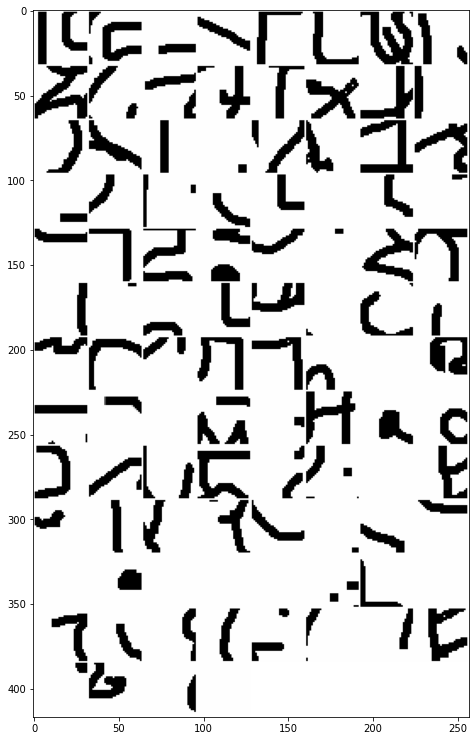

In [0]:
# parameters
list_filter_interest_layer4 = [0,5,10,15,20,25,30,35,40,45,50,55,60,63]
best = True
worst = False
viz_mean_img = True

viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer4_no_binary
activations = activation_layer4_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer4)

##### Binary model layer1:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


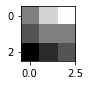

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


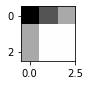

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


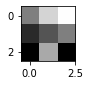

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


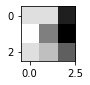

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


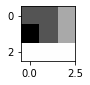

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


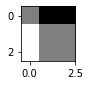

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


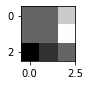

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


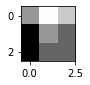

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


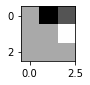

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


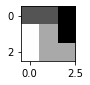

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


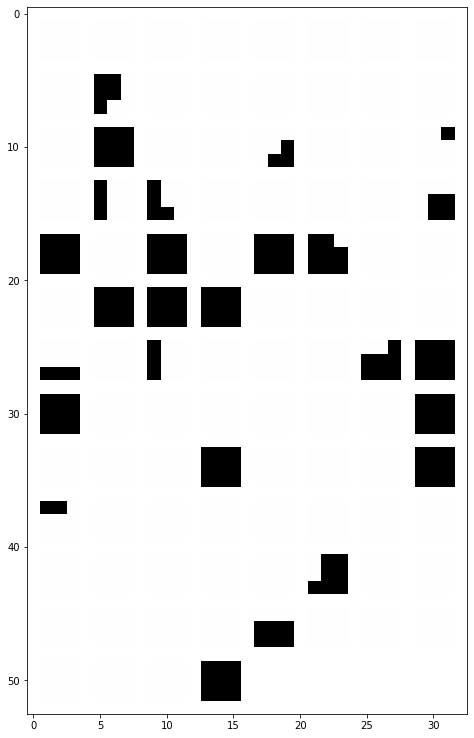

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


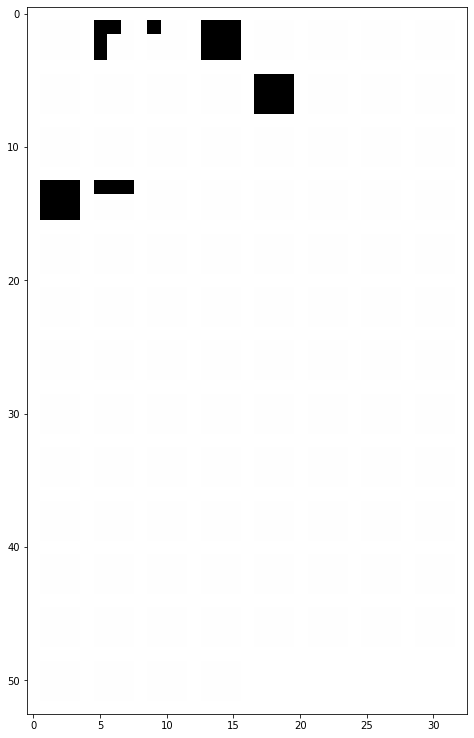

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


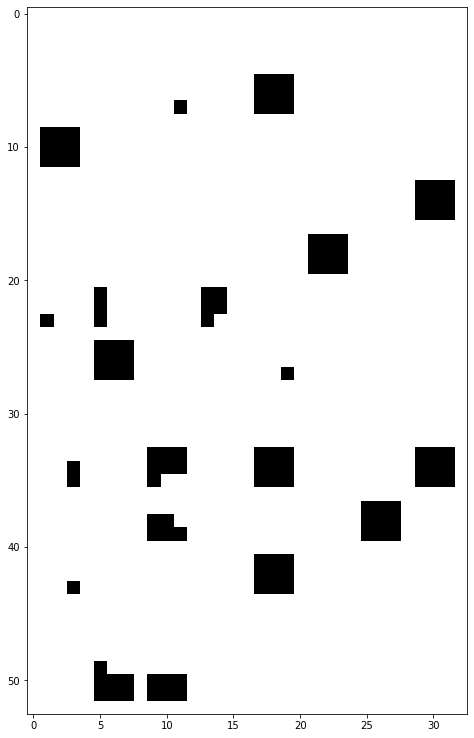

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


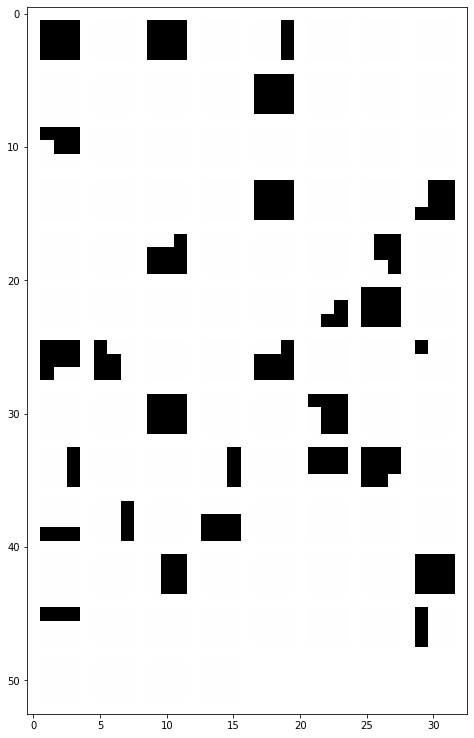

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


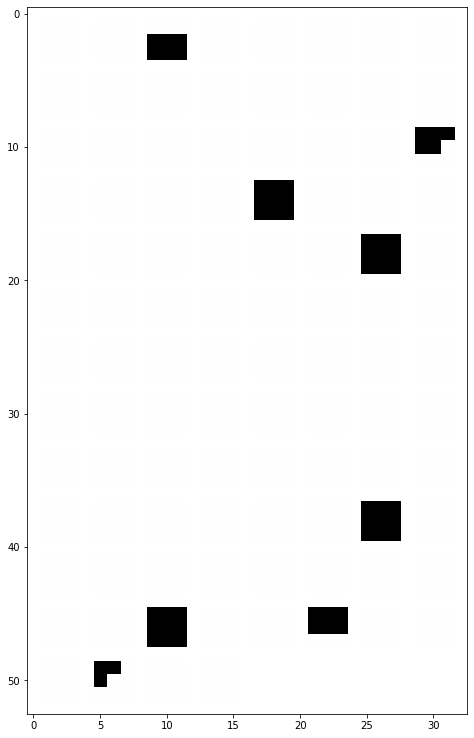

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


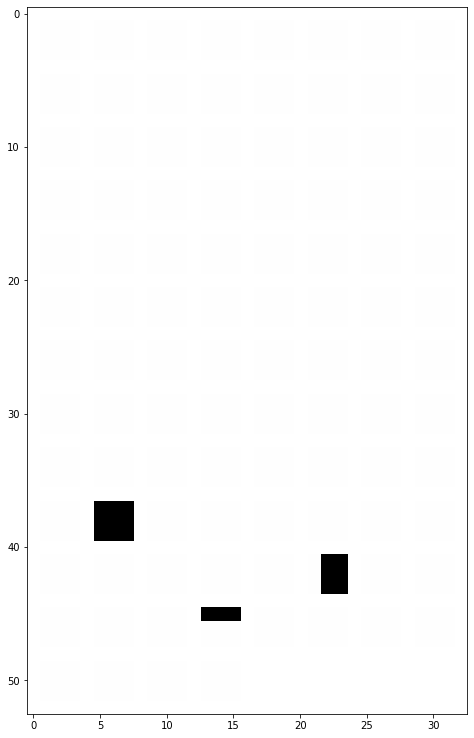

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


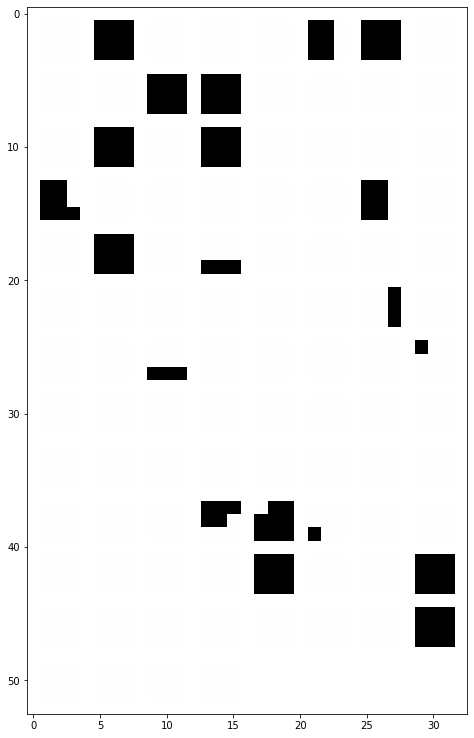

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


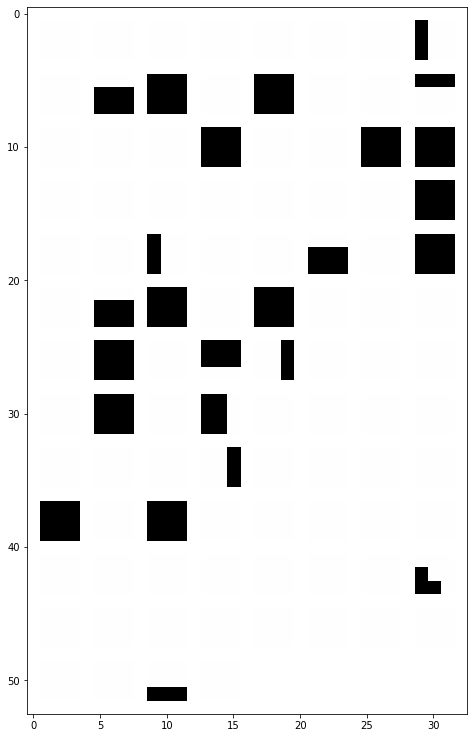

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


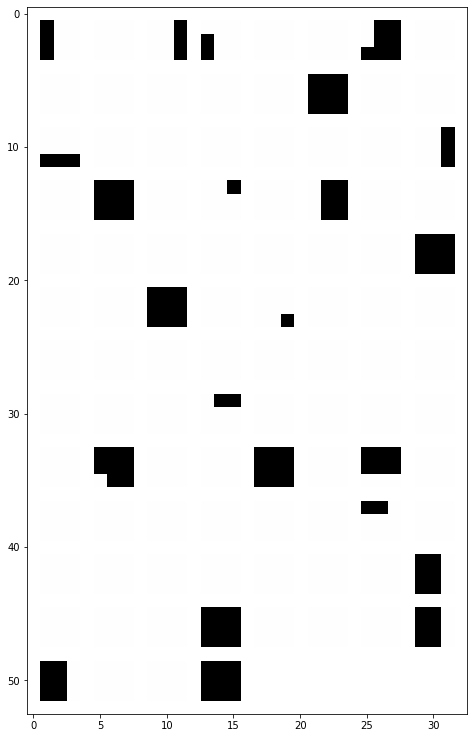

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


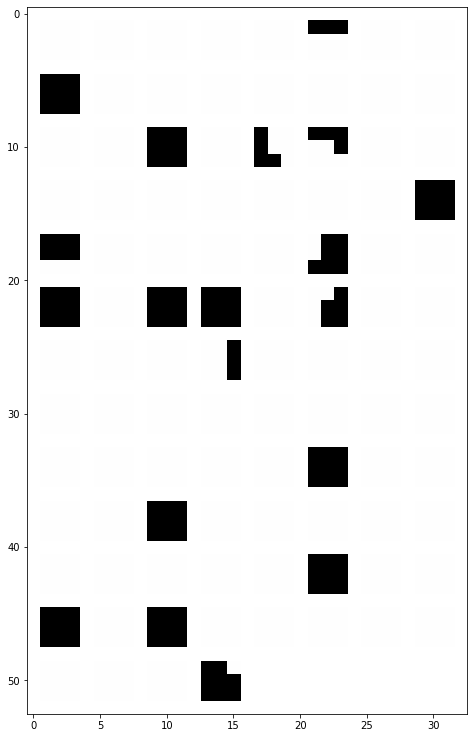

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

##### Binary model layer2:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


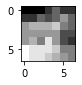

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


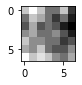

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


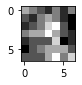

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


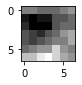

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


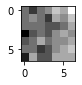

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


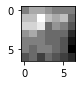

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


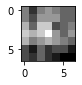

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


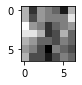

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


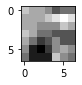

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


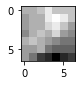

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


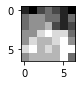

mean regions of 100 regions more=True or worst=False active for filter number: 11 :


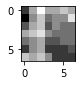

mean regions of 100 regions more=True or worst=False active for filter number: 12 :


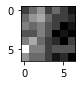

mean regions of 100 regions more=True or worst=False active for filter number: 13 :


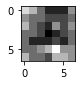

mean regions of 100 regions more=True or worst=False active for filter number: 14 :


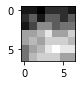

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


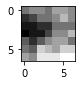

mean regions of 100 regions more=True or worst=False active for filter number: 16 :


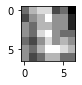

mean regions of 100 regions more=True or worst=False active for filter number: 17 :


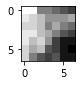

mean regions of 100 regions more=True or worst=False active for filter number: 18 :


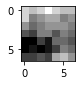

mean regions of 100 regions more=True or worst=False active for filter number: 19 :


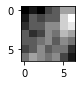

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


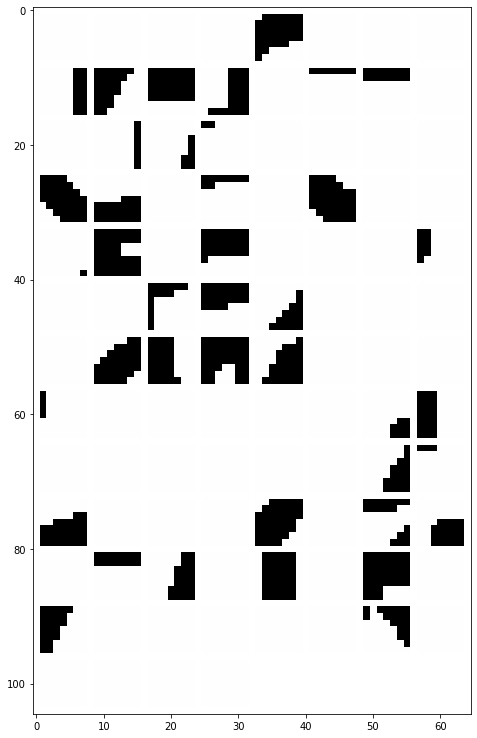

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


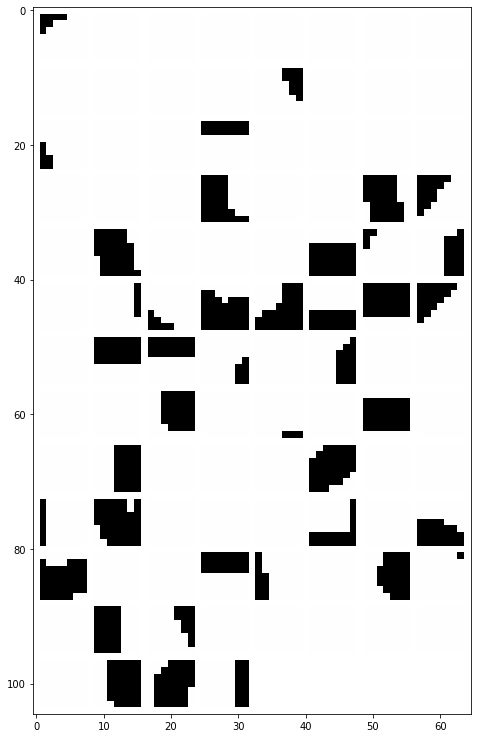

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


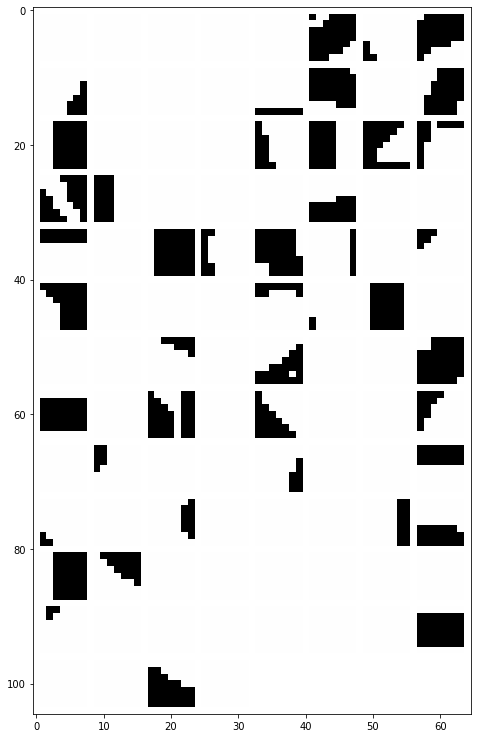

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


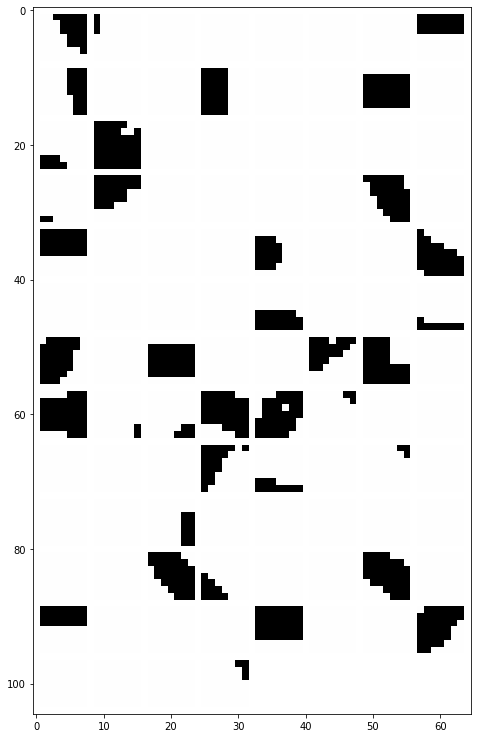

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


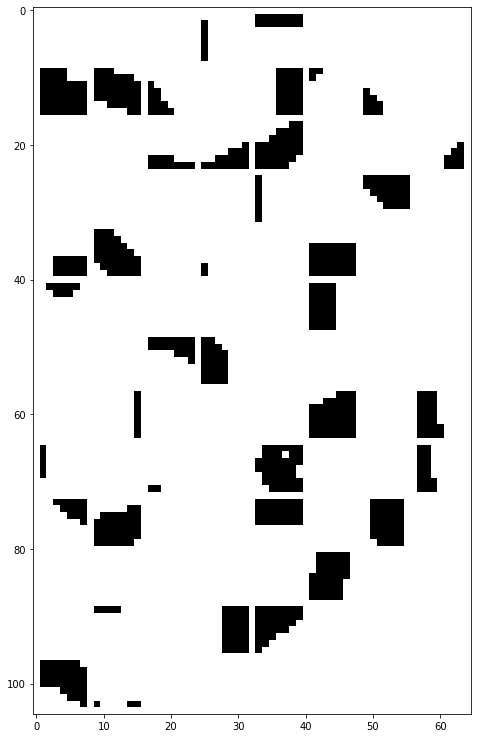

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


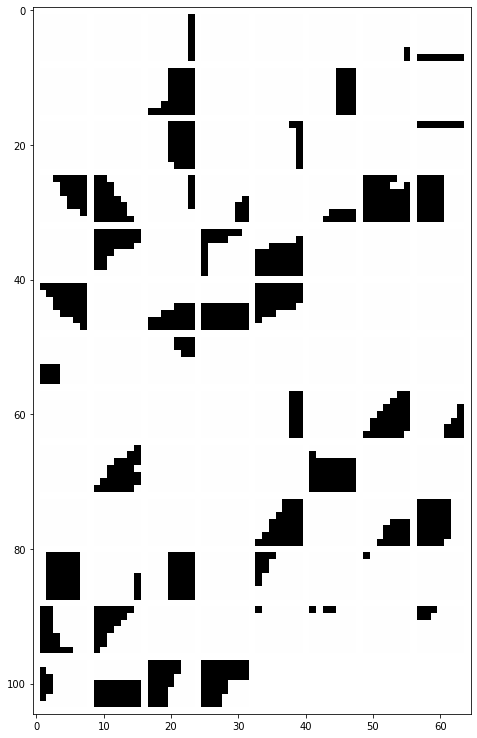

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


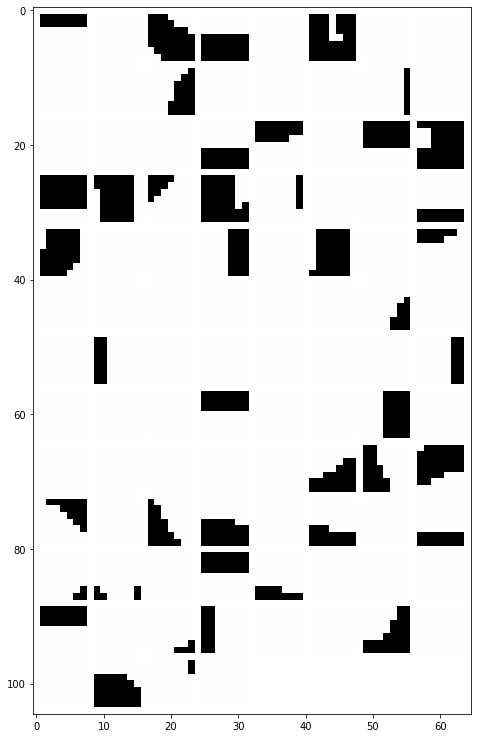

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


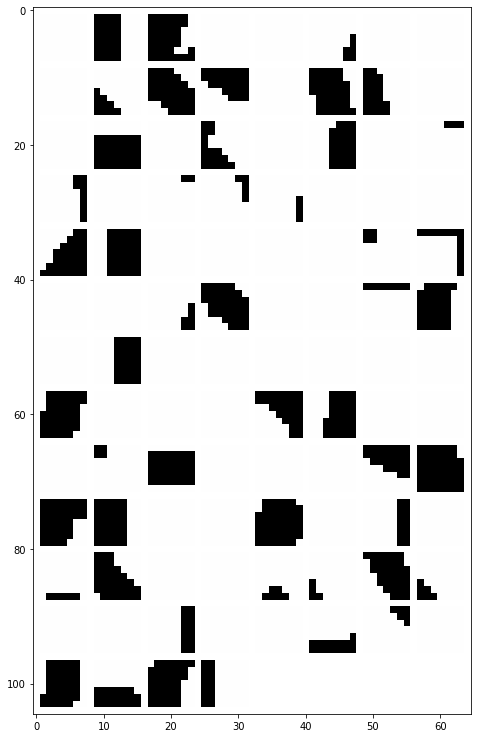

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


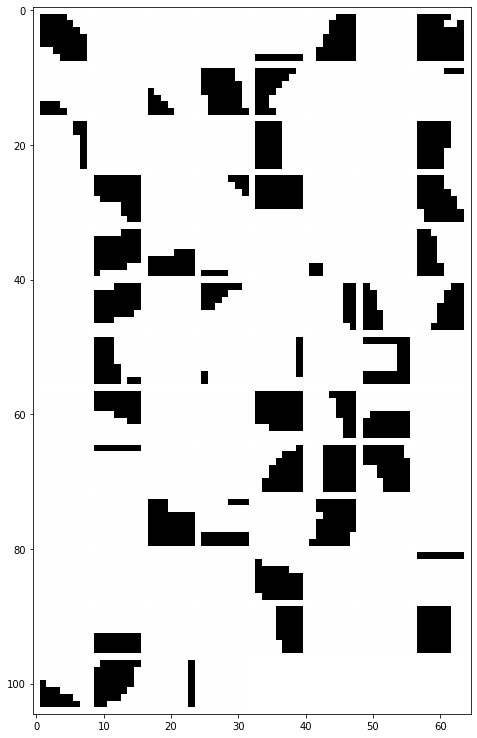

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


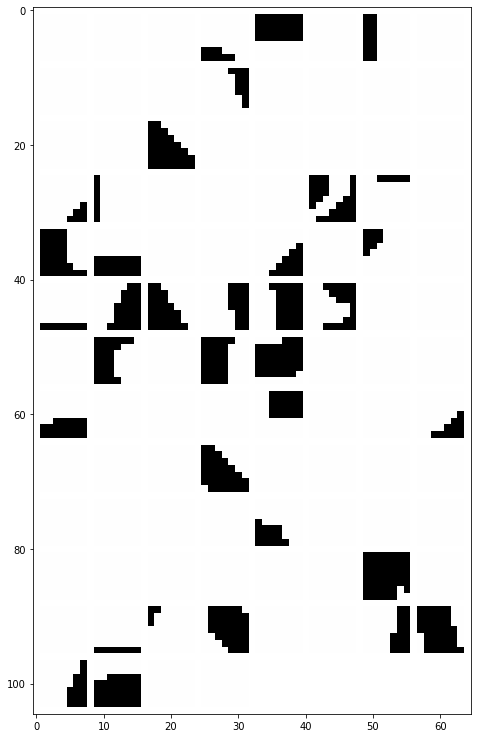

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


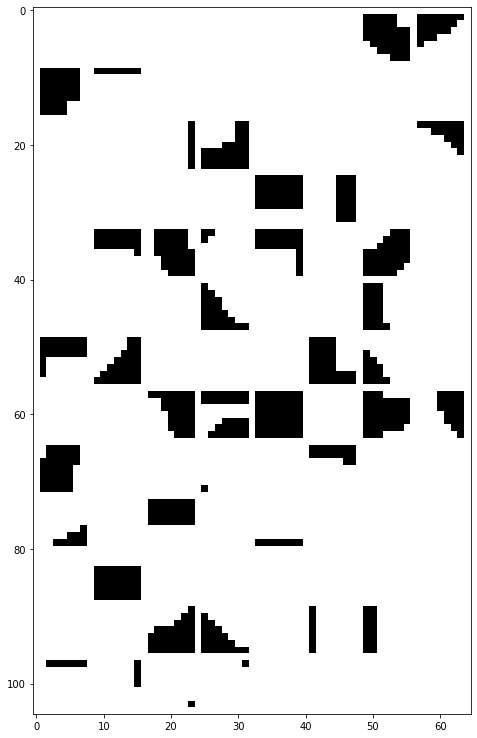

grid regions of 100 regions more=True or worst=False active for filter number: 11 :


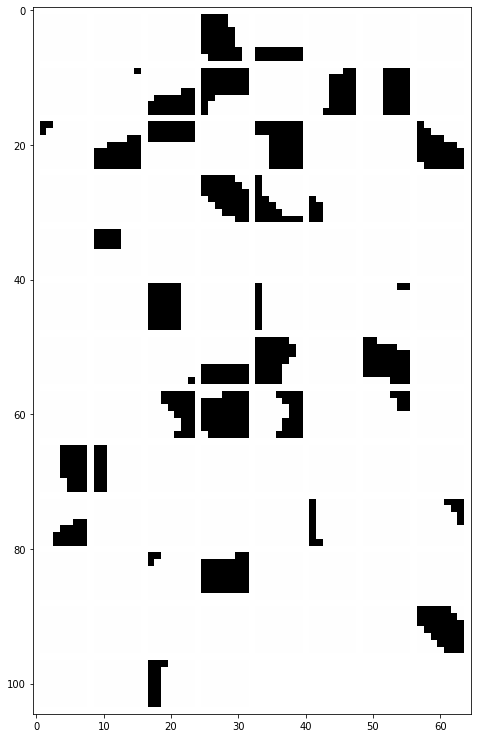

grid regions of 100 regions more=True or worst=False active for filter number: 12 :


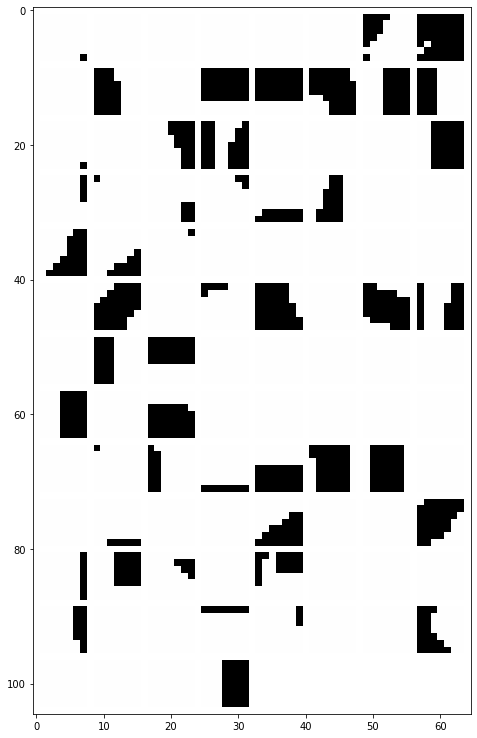

grid regions of 100 regions more=True or worst=False active for filter number: 13 :


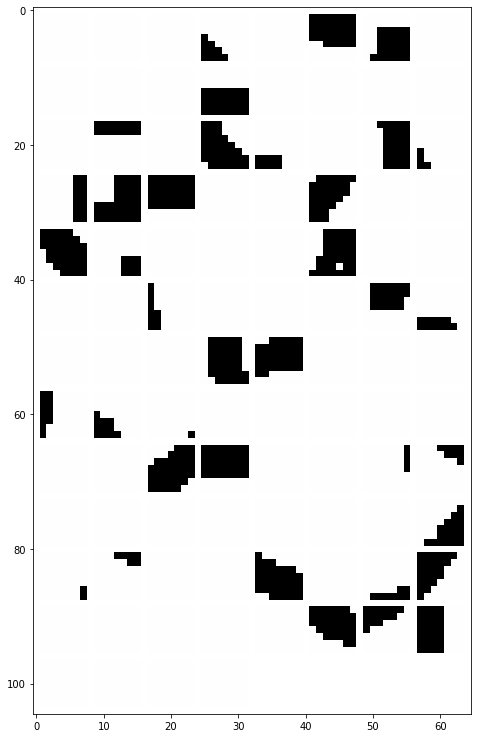

grid regions of 100 regions more=True or worst=False active for filter number: 14 :


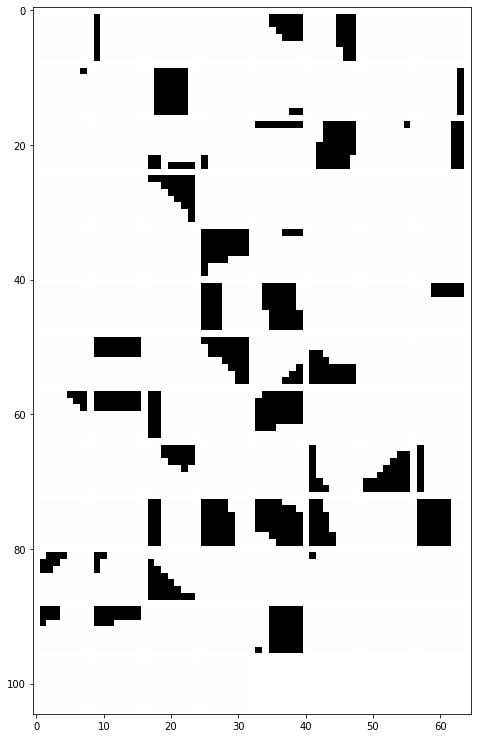

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


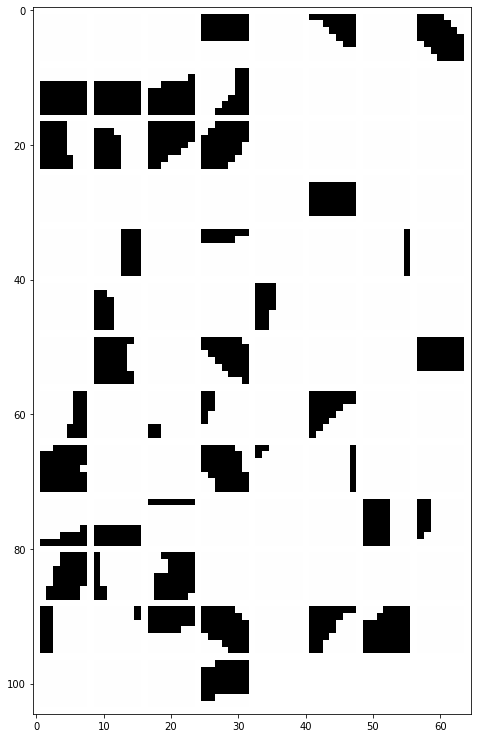

grid regions of 100 regions more=True or worst=False active for filter number: 16 :


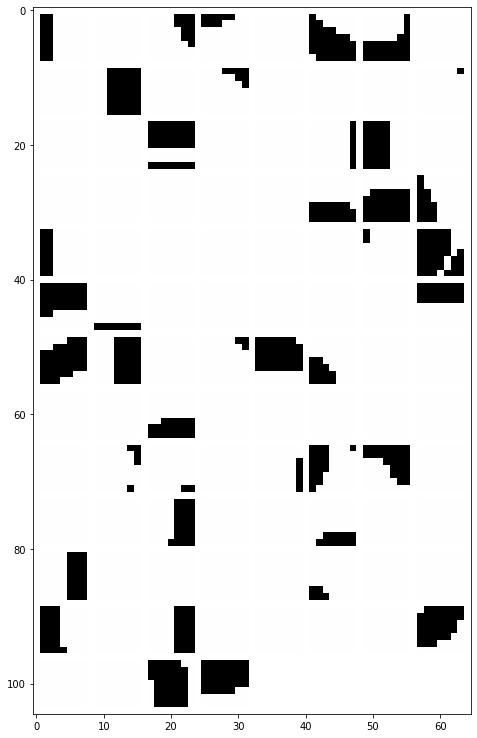

grid regions of 100 regions more=True or worst=False active for filter number: 17 :


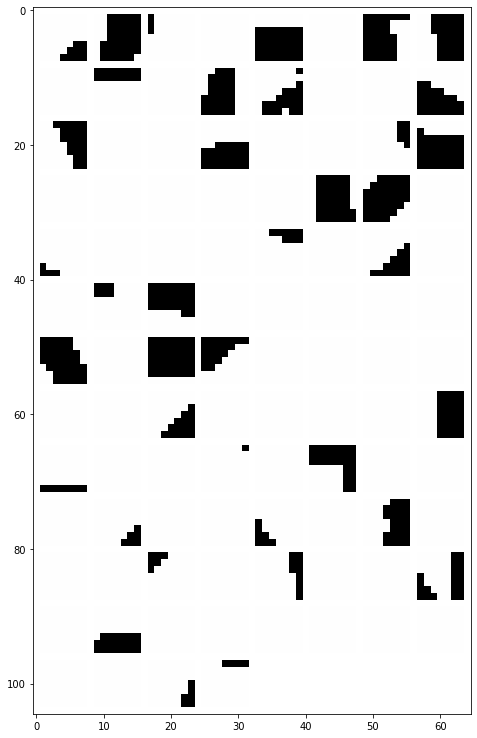

grid regions of 100 regions more=True or worst=False active for filter number: 18 :


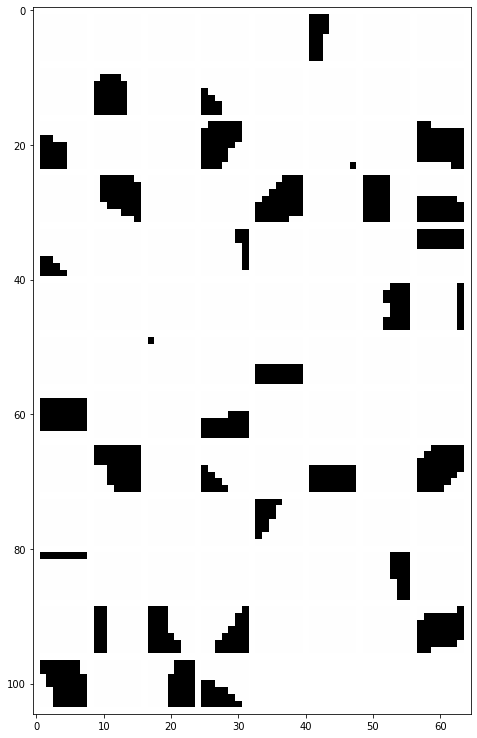

grid regions of 100 regions more=True or worst=False active for filter number: 19 :


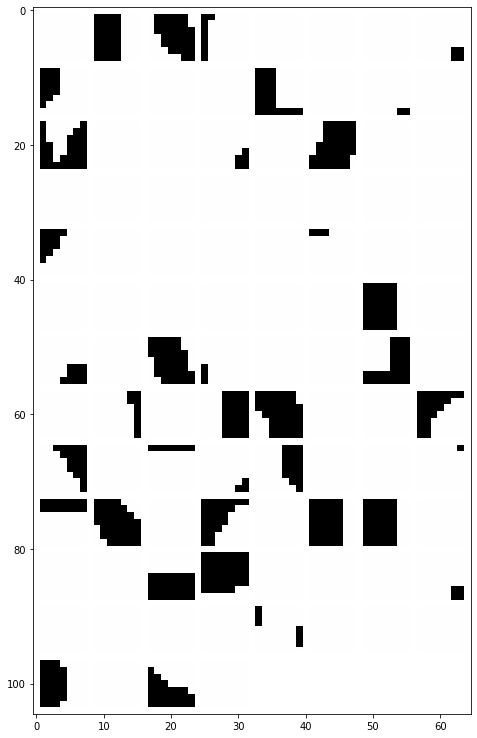

In [0]:
# parameters
list_filter_interest_layer2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer2_binary
activations = activation_layer2_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer2)

##### Binary model layer3:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


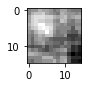

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


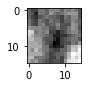

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


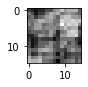

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


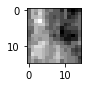

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


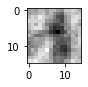

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


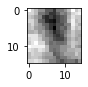

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


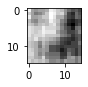

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


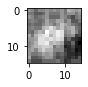

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


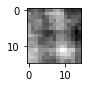

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


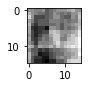

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


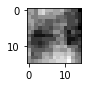

mean regions of 100 regions more=True or worst=False active for filter number: 11 :


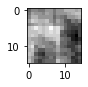

mean regions of 100 regions more=True or worst=False active for filter number: 12 :


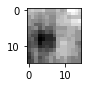

mean regions of 100 regions more=True or worst=False active for filter number: 13 :


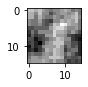

mean regions of 100 regions more=True or worst=False active for filter number: 14 :


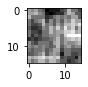

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


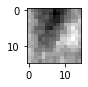

mean regions of 100 regions more=True or worst=False active for filter number: 16 :


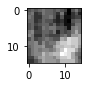

mean regions of 100 regions more=True or worst=False active for filter number: 17 :


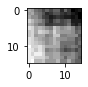

mean regions of 100 regions more=True or worst=False active for filter number: 18 :


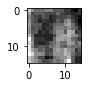

mean regions of 100 regions more=True or worst=False active for filter number: 19 :


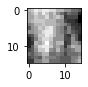

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


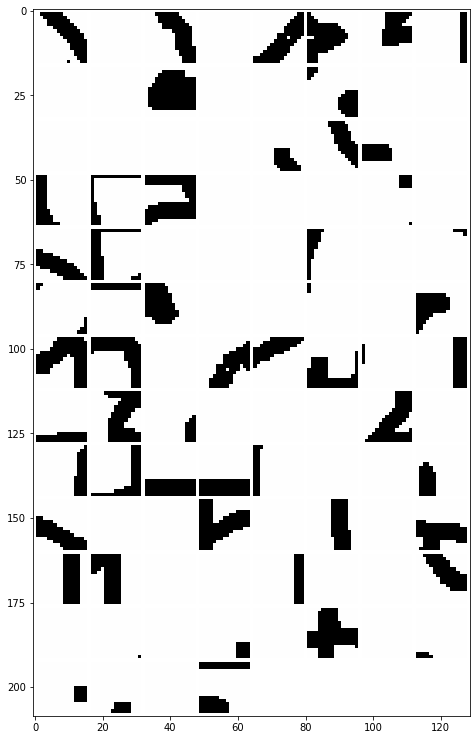

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


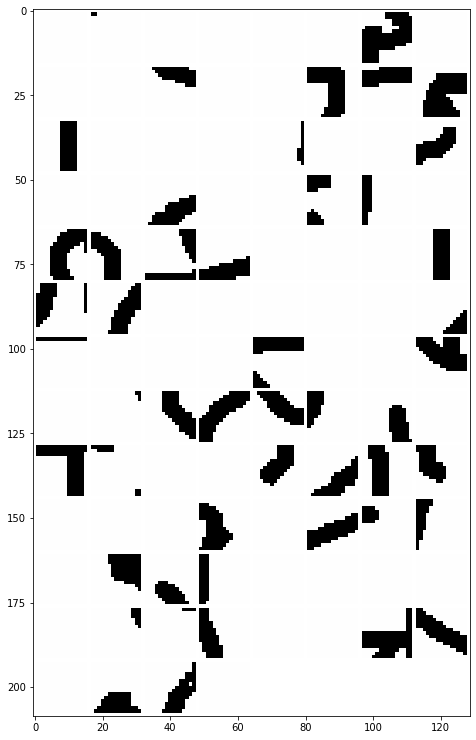

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


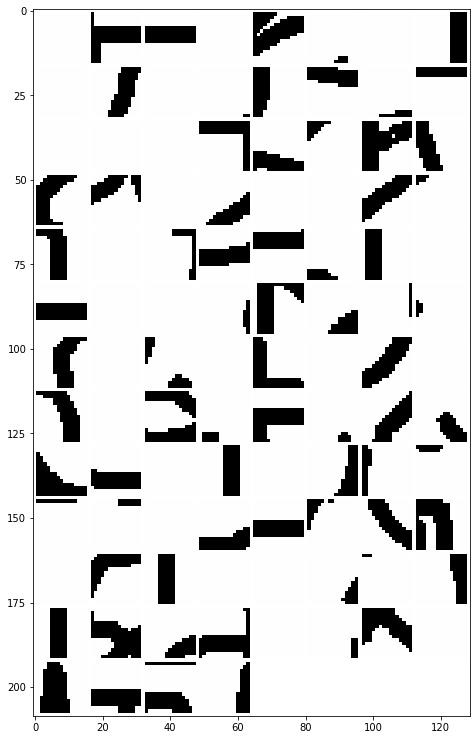

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


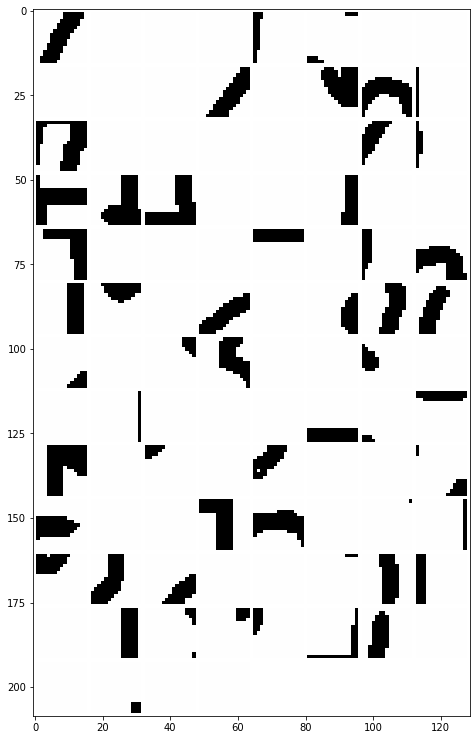

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


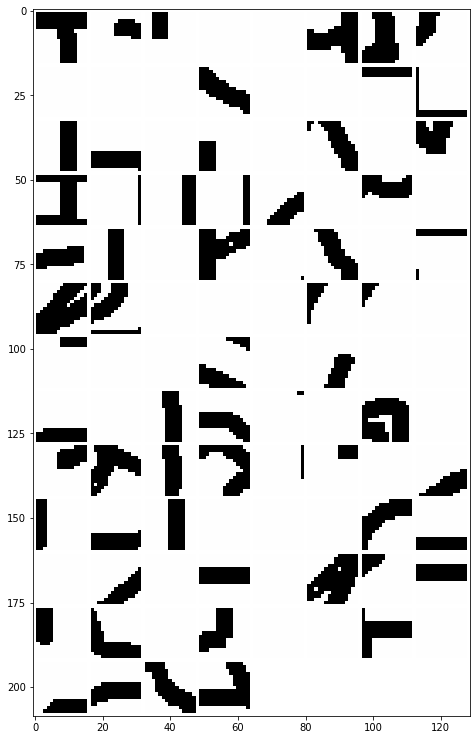

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


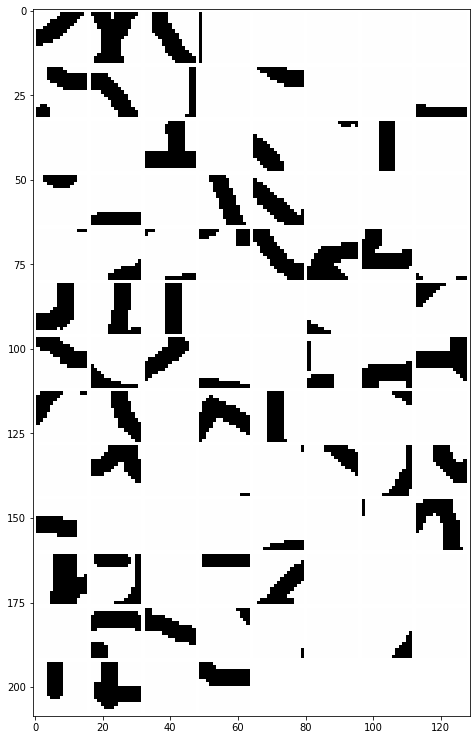

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


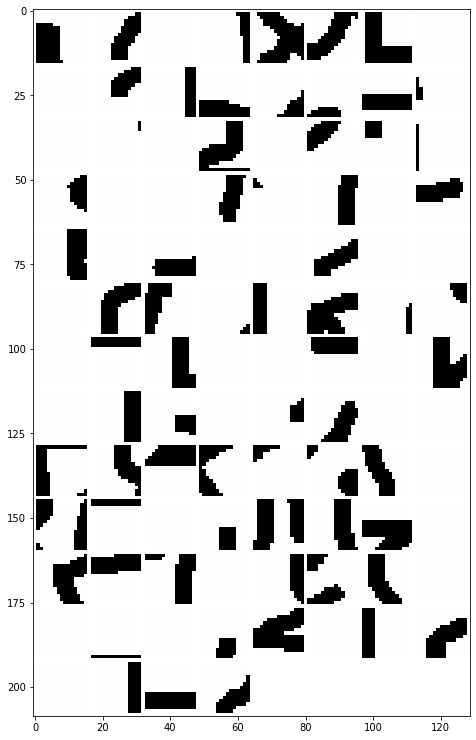

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


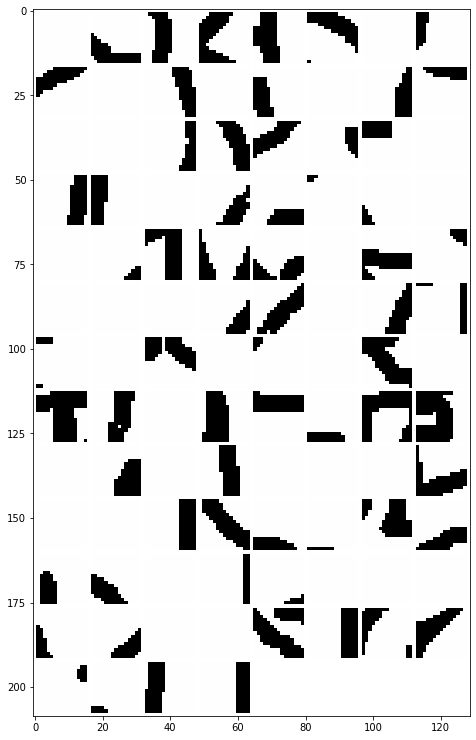

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


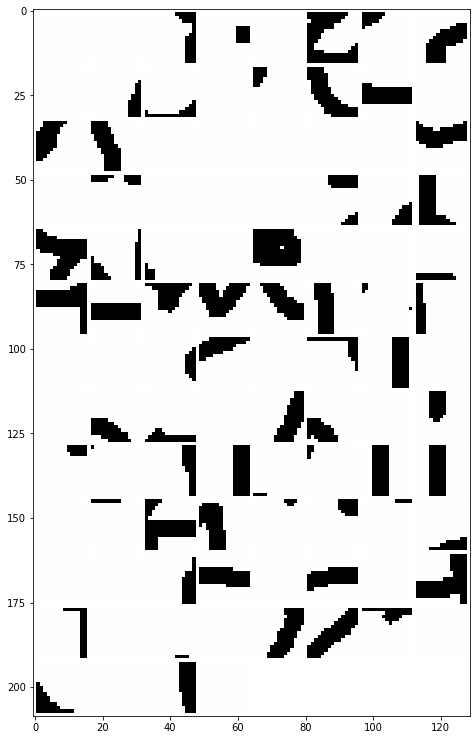

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


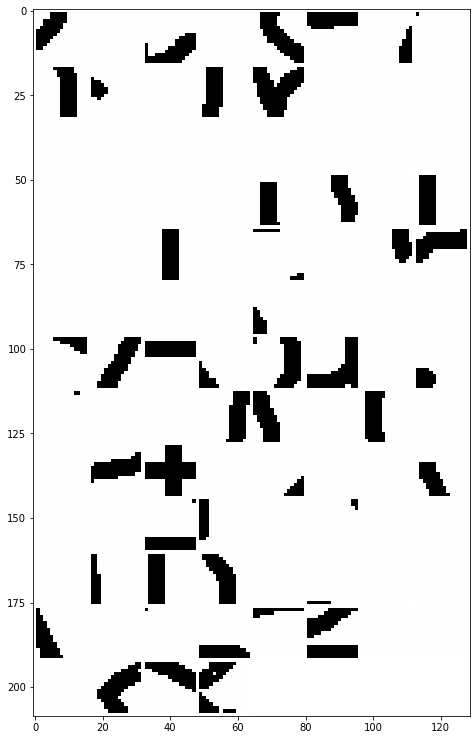

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


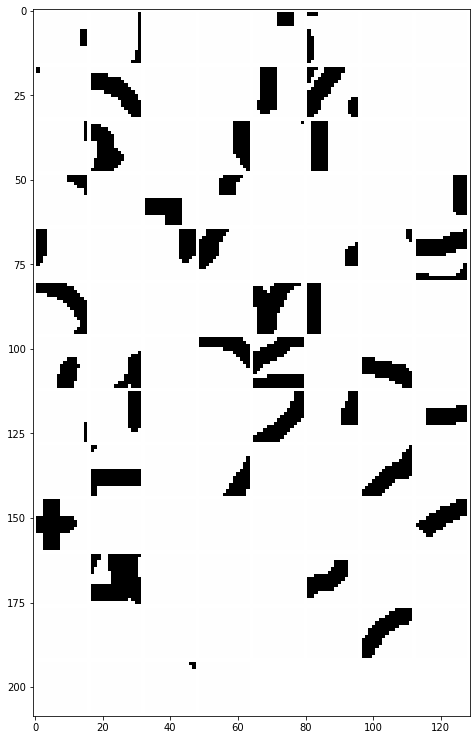

grid regions of 100 regions more=True or worst=False active for filter number: 11 :


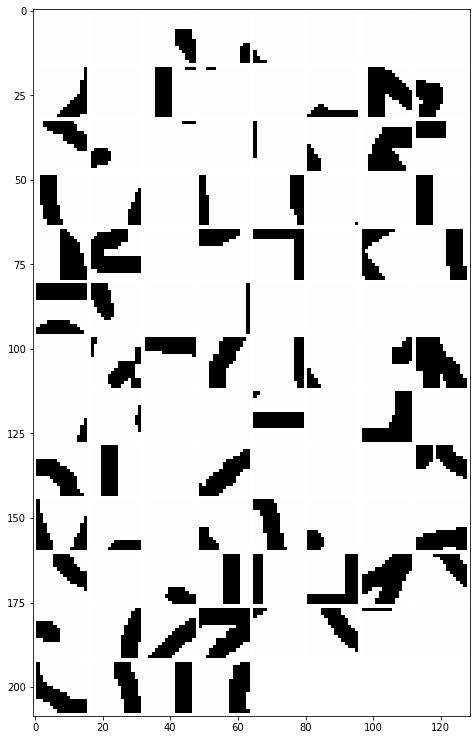

grid regions of 100 regions more=True or worst=False active for filter number: 12 :


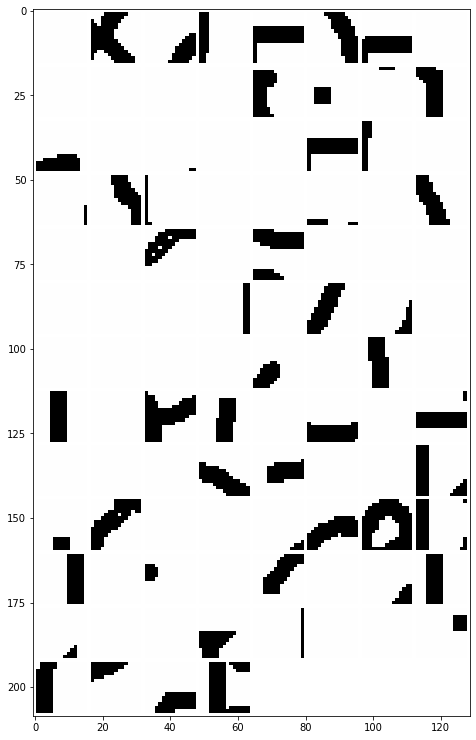

grid regions of 100 regions more=True or worst=False active for filter number: 13 :


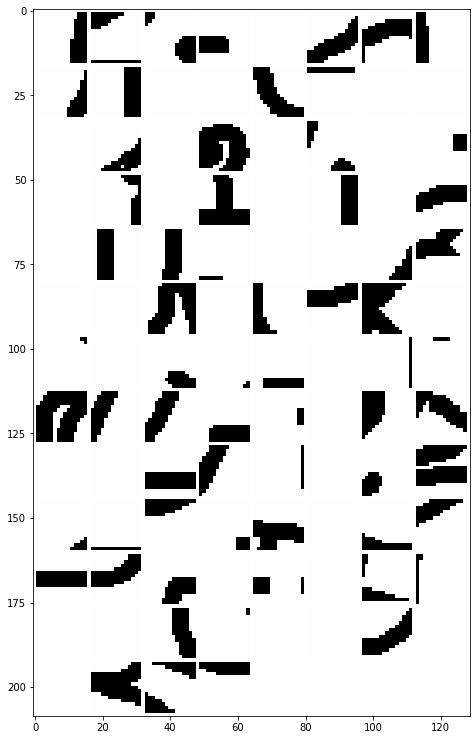

grid regions of 100 regions more=True or worst=False active for filter number: 14 :


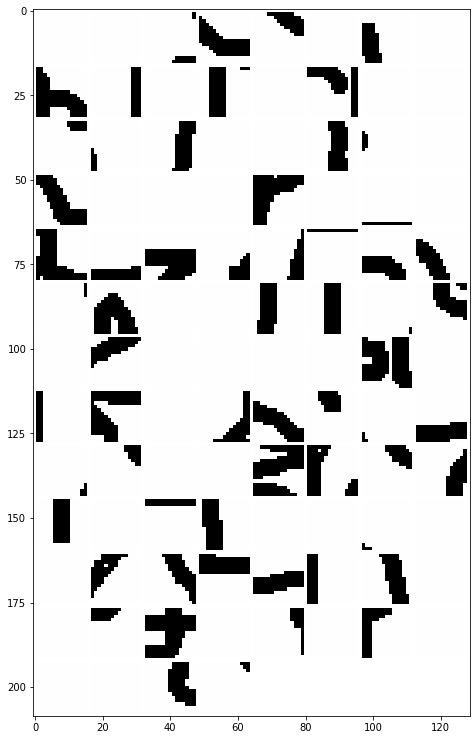

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


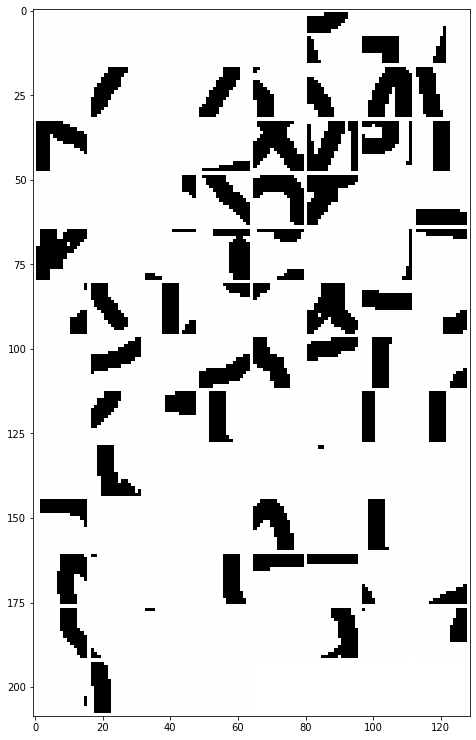

grid regions of 100 regions more=True or worst=False active for filter number: 16 :


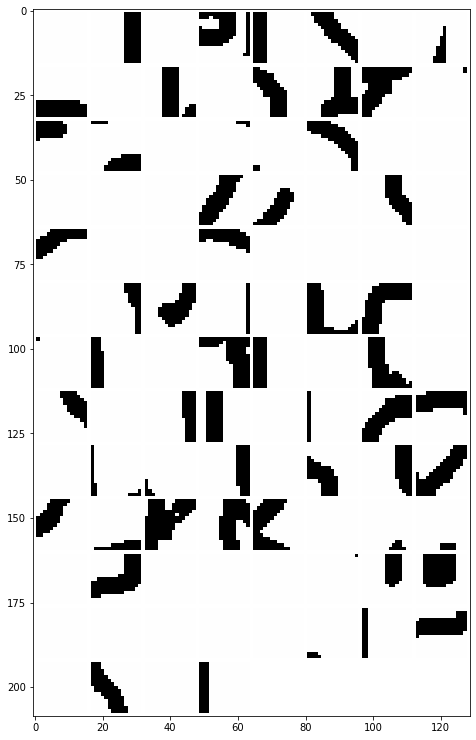

grid regions of 100 regions more=True or worst=False active for filter number: 17 :


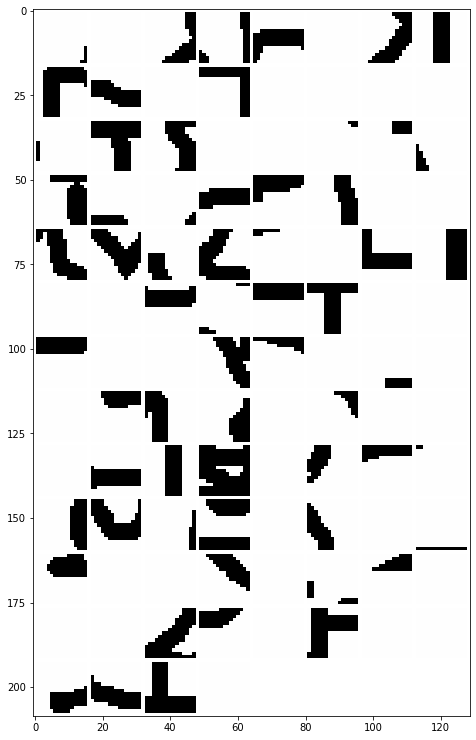

grid regions of 100 regions more=True or worst=False active for filter number: 18 :


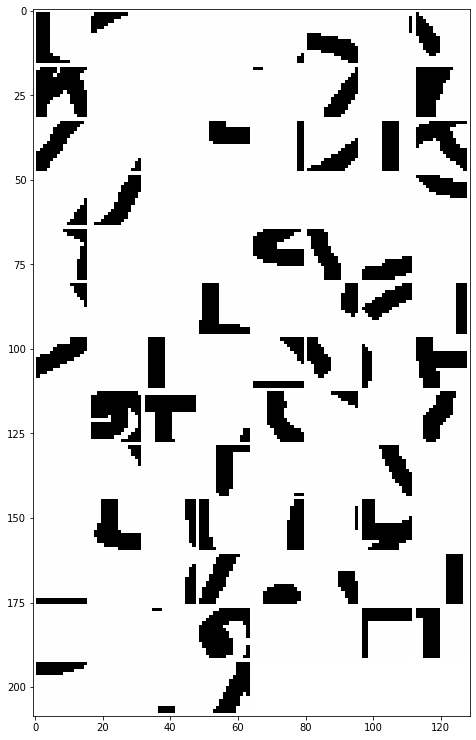

grid regions of 100 regions more=True or worst=False active for filter number: 19 :


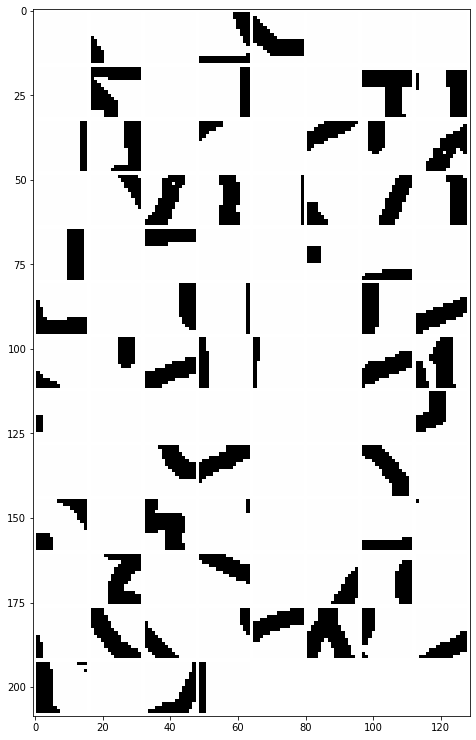

In [0]:
# parameters
list_filter_interest_layer3 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer3_binary
activations = activation_layer3_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer3)

##### Binary model layer4:

Interest of filters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Consider 10% image regions = 100 images
mean image:
mean regions of 100 regions more=True or worst=False active for filter number: 0 :


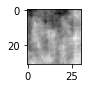

mean regions of 100 regions more=True or worst=False active for filter number: 1 :


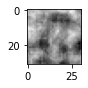

mean regions of 100 regions more=True or worst=False active for filter number: 2 :


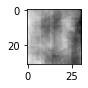

mean regions of 100 regions more=True or worst=False active for filter number: 3 :


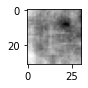

mean regions of 100 regions more=True or worst=False active for filter number: 4 :


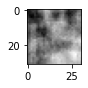

mean regions of 100 regions more=True or worst=False active for filter number: 5 :


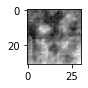

mean regions of 100 regions more=True or worst=False active for filter number: 6 :


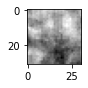

mean regions of 100 regions more=True or worst=False active for filter number: 7 :


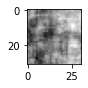

mean regions of 100 regions more=True or worst=False active for filter number: 8 :


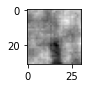

mean regions of 100 regions more=True or worst=False active for filter number: 9 :


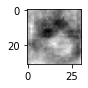

mean regions of 100 regions more=True or worst=False active for filter number: 10 :


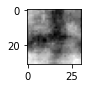

mean regions of 100 regions more=True or worst=False active for filter number: 11 :


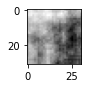

mean regions of 100 regions more=True or worst=False active for filter number: 12 :


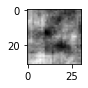

mean regions of 100 regions more=True or worst=False active for filter number: 13 :


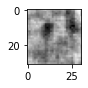

mean regions of 100 regions more=True or worst=False active for filter number: 14 :


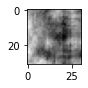

mean regions of 100 regions more=True or worst=False active for filter number: 15 :


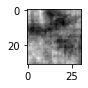

mean regions of 100 regions more=True or worst=False active for filter number: 16 :


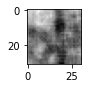

mean regions of 100 regions more=True or worst=False active for filter number: 17 :


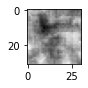

mean regions of 100 regions more=True or worst=False active for filter number: 18 :


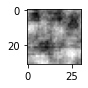

mean regions of 100 regions more=True or worst=False active for filter number: 19 :


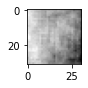

grid image
grid regions of 100 regions more=True or worst=False active for filter number: 0 :


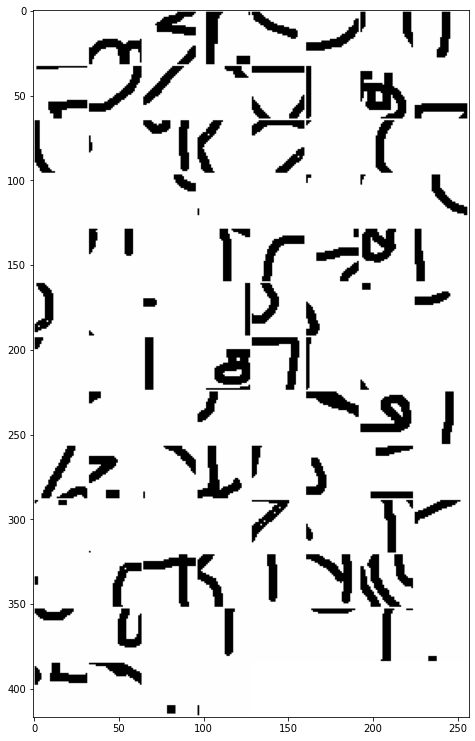

grid regions of 100 regions more=True or worst=False active for filter number: 1 :


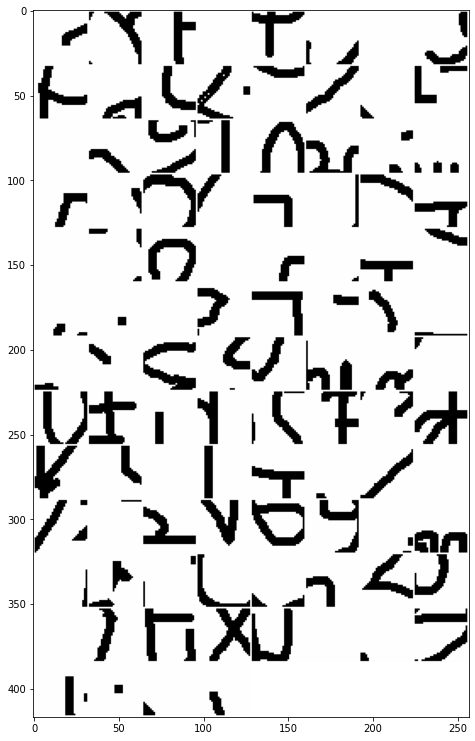

grid regions of 100 regions more=True or worst=False active for filter number: 2 :


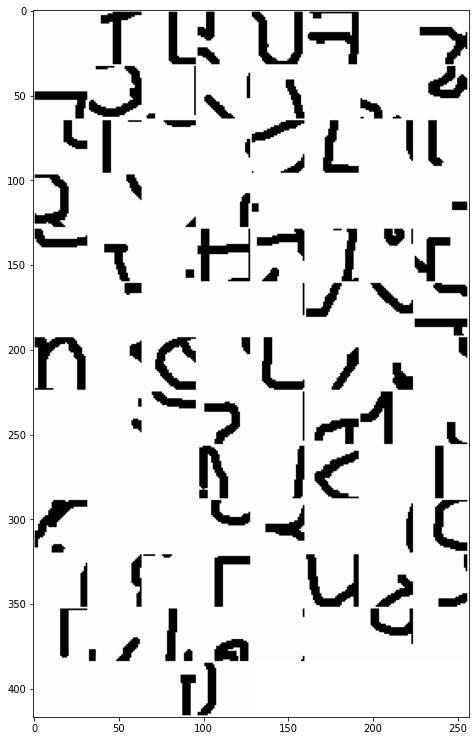

grid regions of 100 regions more=True or worst=False active for filter number: 3 :


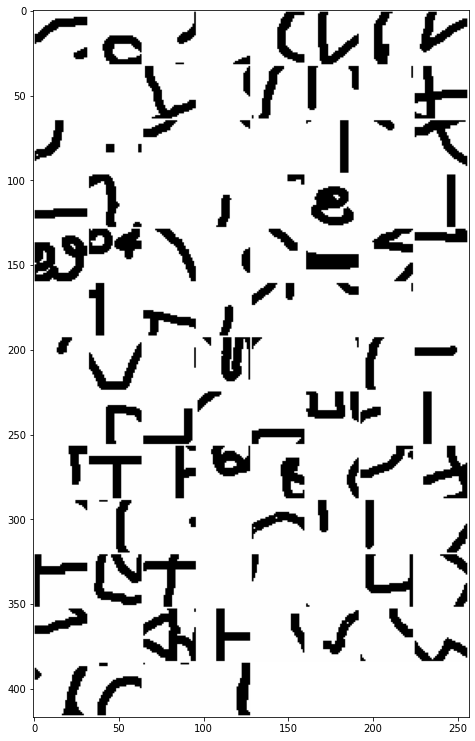

grid regions of 100 regions more=True or worst=False active for filter number: 4 :


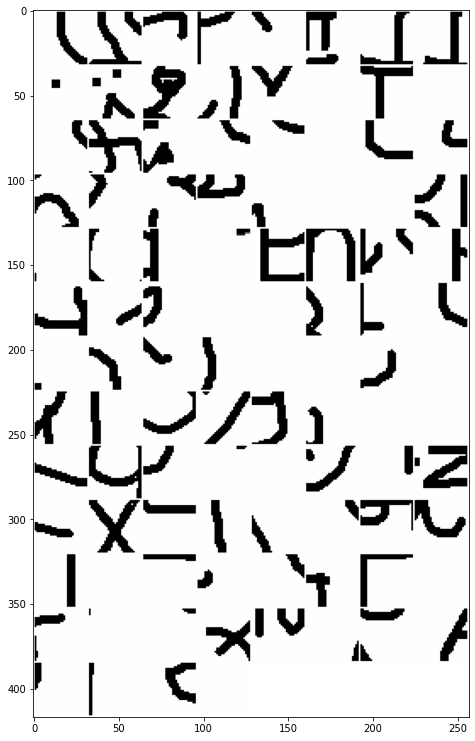

grid regions of 100 regions more=True or worst=False active for filter number: 5 :


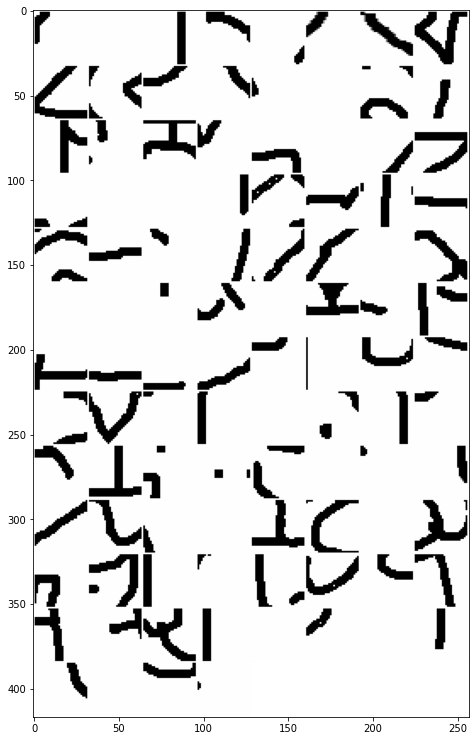

grid regions of 100 regions more=True or worst=False active for filter number: 6 :


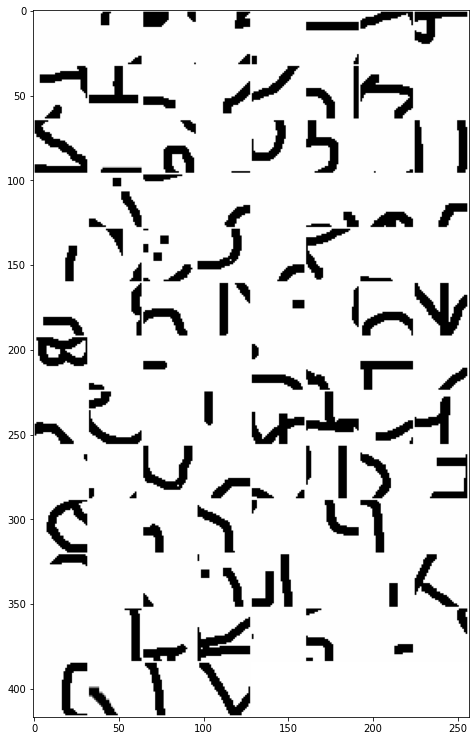

grid regions of 100 regions more=True or worst=False active for filter number: 7 :


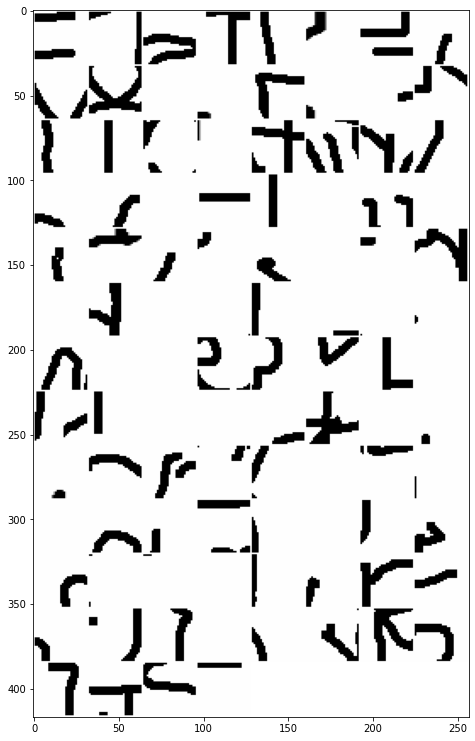

grid regions of 100 regions more=True or worst=False active for filter number: 8 :


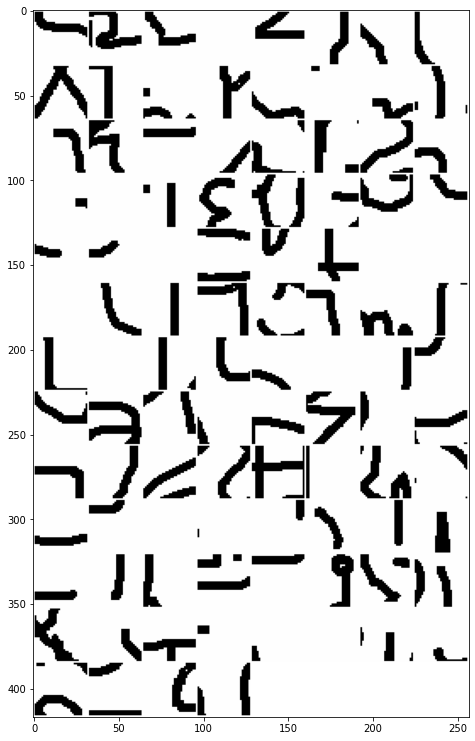

grid regions of 100 regions more=True or worst=False active for filter number: 9 :


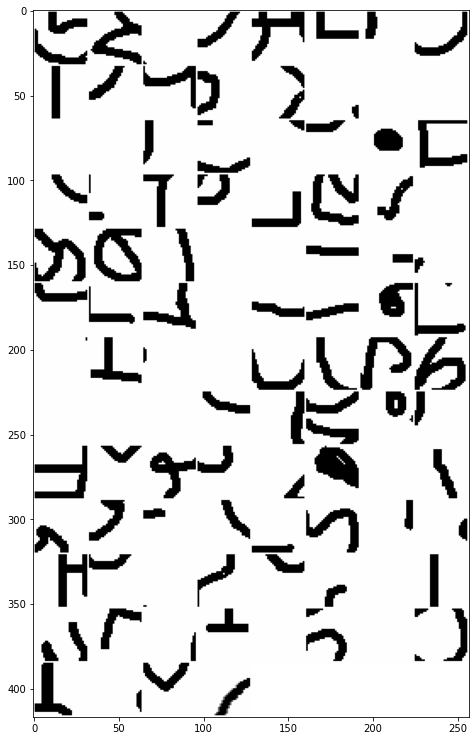

grid regions of 100 regions more=True or worst=False active for filter number: 10 :


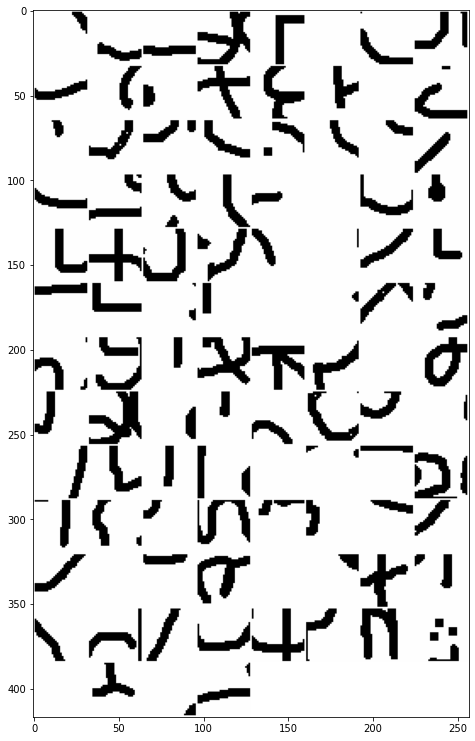

grid regions of 100 regions more=True or worst=False active for filter number: 11 :


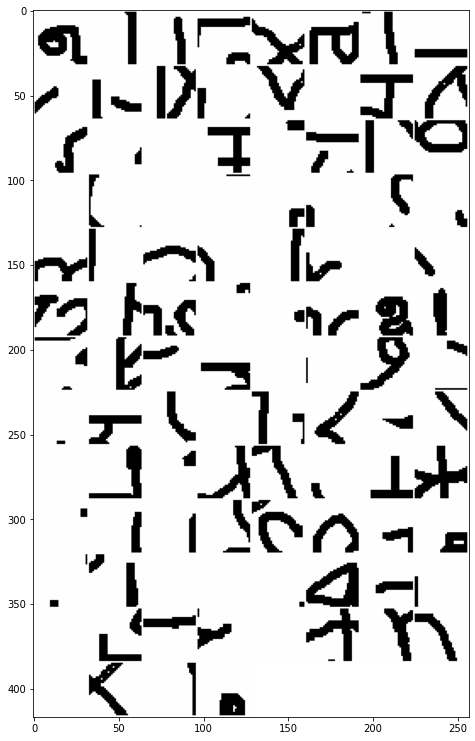

grid regions of 100 regions more=True or worst=False active for filter number: 12 :


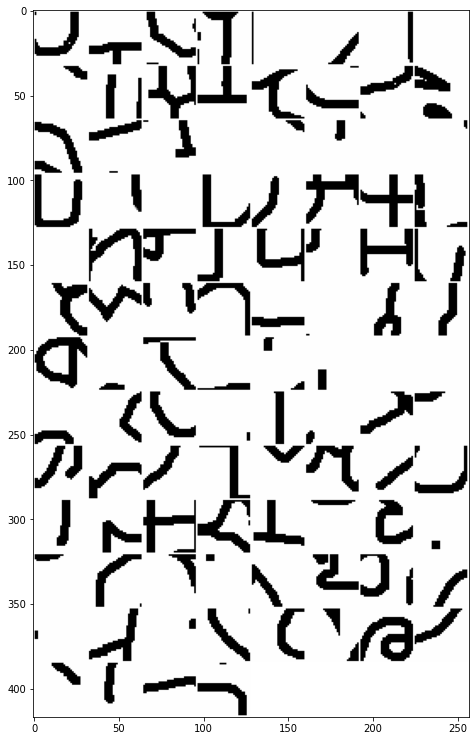

grid regions of 100 regions more=True or worst=False active for filter number: 13 :


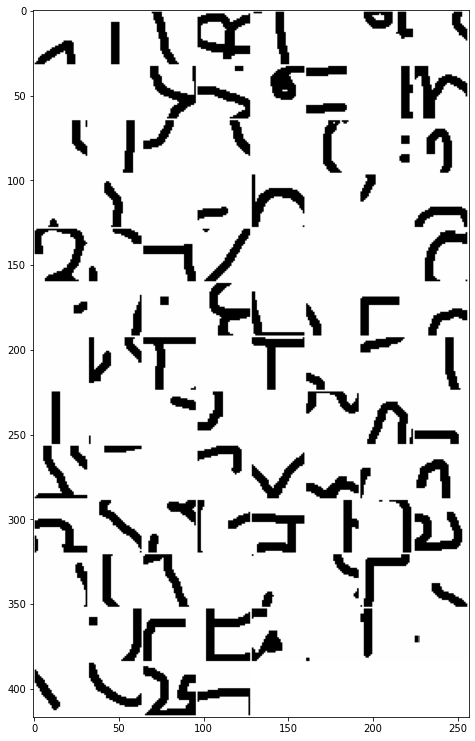

grid regions of 100 regions more=True or worst=False active for filter number: 14 :


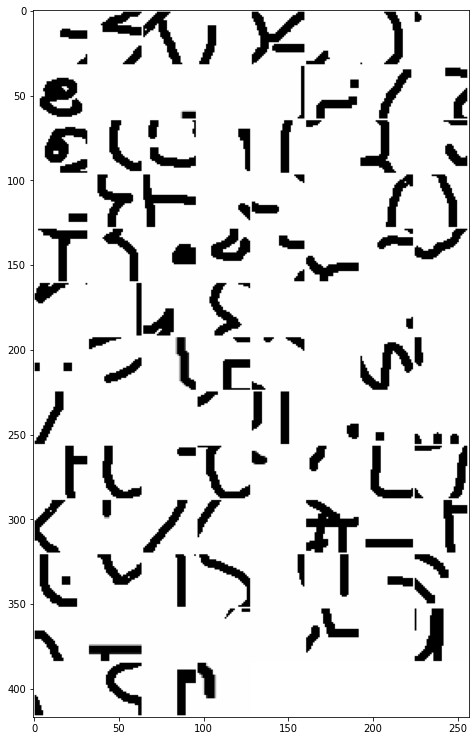

grid regions of 100 regions more=True or worst=False active for filter number: 15 :


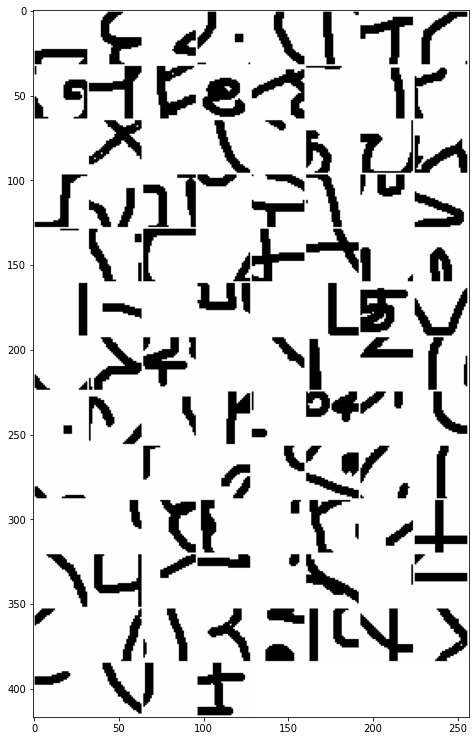

grid regions of 100 regions more=True or worst=False active for filter number: 16 :


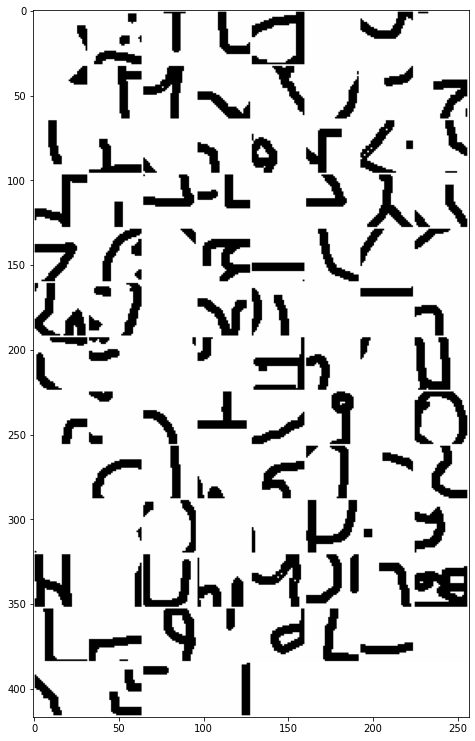

grid regions of 100 regions more=True or worst=False active for filter number: 17 :


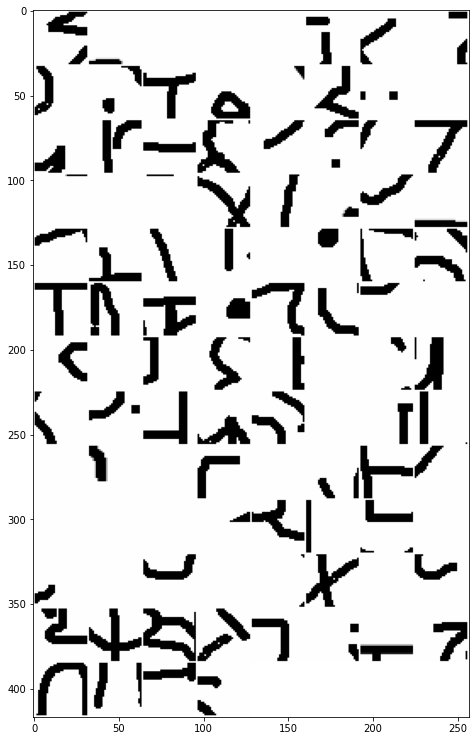

grid regions of 100 regions more=True or worst=False active for filter number: 18 :


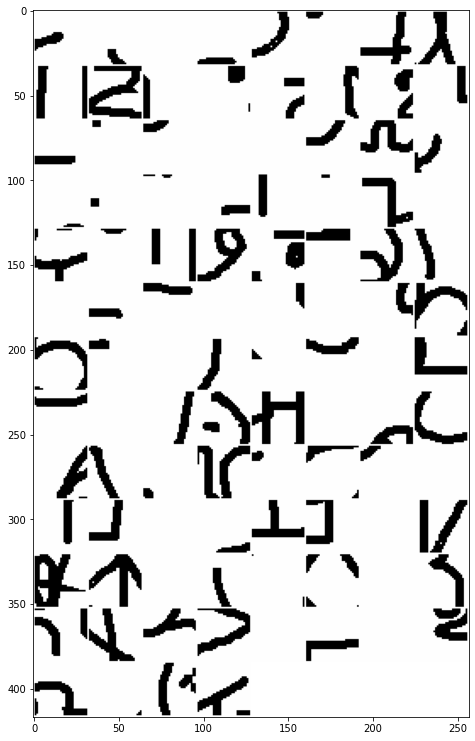

grid regions of 100 regions more=True or worst=False active for filter number: 19 :


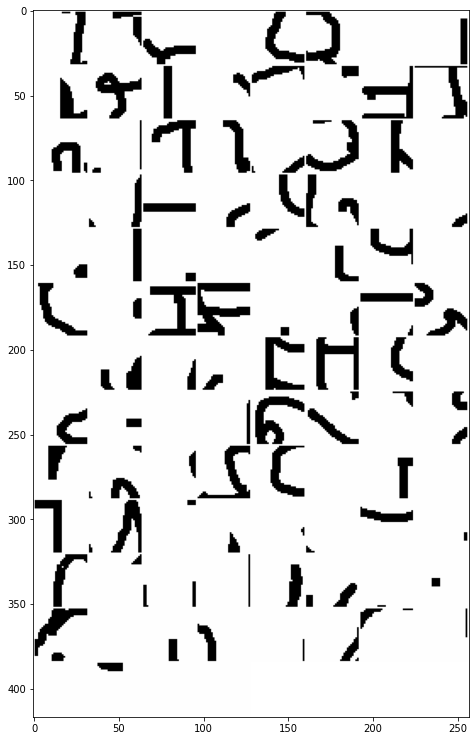

In [0]:
# parameters
list_filter_interest_layer4 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
best = True
worst = False
viz_mean_img = True
viz_grid = True
percentage = 10

# regions and activation of interest
regions = region_layer4_binary
activations = activation_layer4_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer4)

## Viz all:

### No binary model:

In [0]:
viz_filters(model_no_binary)

In [0]:
g_ascent_no_binary = GradientAscent(model_no_binary, img_size=28)
g_ascent_no_binary.use_gpu = True

conv1_no_binary = model_no_binary.layer1
conv1_filters_no_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_no_binary.visualize(conv1_no_binary, conv1_filters_no_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='No binary model: conv layer 1')

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_no_binary
activations = activation_layer1_no_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

### Binary model:

In [0]:
viz_filters(model_binary)

In [0]:
g_ascent_binary = GradientAscent(model_binary, img_size=28)
g_ascent_binary.use_gpu = True

conv1_binary = model_binary.layer1
conv1_filters_binary = [0,1,2,3,4,5,6,7,8,9]
mean_gradient_layer1 = False
ind_x_layer1 = 7
ind_y_layer1 = 7


g_ascent_binary.visualize(conv1_binary, conv1_filters_binary, mean_gradient_layer1,
                             ind_x_layer1, ind_y_layer1, title='Binary model: conv layer 1')

In [0]:
# parameters
list_filter_interest_layer1 = [0,1,2,3,4,5,6,7,8,9]
best = True
worst = False
viz_mean_img = True
viz_grid = False
percentage = 100

# regions and activation of interest
regions = region_layer1_binary
activations = activation_layer1_binary

selected_regions = get_regions_interest(regions, activations, best, worst, viz_mean_img, viz_grid, percentage, list_filter_interest_layer1)

# Draft

In [0]:
from torchvision import datasets, transforms

In [0]:
background_set = datasets.Omniglot(root=PATH + '/data', background=True, download=True, transform=all_transforms)

In [0]:
train_data_wt = datasets.MNIST('./data', train=True, download=True,
                                transform=transforms.Compose([transforms.ToTensor()]))

In [0]:
len(train_data)

60000

In [0]:
im = train_data[0]

In [0]:
np.mean(train_data)

In [0]:
im_wt = train_data_wt[0]


In [0]:
im_wt

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [0]:
im

(tensor([[[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
           -0.4242, -0.4242, -0.424